# Results

In [1]:
import pandas as pd


metrics = [
        "accuracy",
        "balanced_accuracy",
        "f1",
        "precision",
        "recall",
        "specificity",
        "ROC_AUC",
        "MCC",
    ]

In [2]:
import os


all_models_results = {}
main_result_folder = os.path.join(".", "results")
datasets = ["hyperactiv", "psykose", "depresjon"]
models = ["LR", "RF", "SVM", "GBM"]
types = ["full_24h", "8_21_day", "8_21_night", "6_22_day", "6_22_night"]

for dataset in datasets:
    paths_to_results_folder = os.path.join(main_result_folder, dataset)
    all_models_results[dataset] = {}
    for t in types:
        all_models_results[dataset][t] = []
        for model in models:
            model_mean_results = pd.read_csv(os.path.join(paths_to_results_folder, f"final_scores_{t}_{model}.csv"))["Mean"]
            model_mean_results.index = metrics
            model_mean_results.name = f"{t} {model}"
            all_models_results[dataset][t].append(model_mean_results)
            

In [3]:
def get_dataset_part_results(dataset_results_folder, models):
    results = []
    for model in models:
        model_mean_results = pd.read_csv(os.path.join(dataset_results_folder, f"{model}.csv"))["Mean"]
        model_mean_results.index = metrics
        name_parts = model.split("_")
        model_mean_results.name = f"{name_parts[-2]} {name_parts[-1]}"
        results.append(model_mean_results)
    return results


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_final_results(
        models_final_results: list[pd.Series], 
        title: str, 
        one_plot: bool = False, 
        figsize: tuple[float, float] = (10, 6)
) -> None:
    df = pd.concat(models_final_results, axis=1)

    print(df)
    
    if one_plot:
        df.plot(kind='bar', figsize=figsize)
        plt.title(title)
        plt.xlabel('Metrics')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plt.legend(title="Models")
        plt.tight_layout()
        plt.show()
    else:
        num_models = len(df.columns)
        colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
        
        num_metrics = len(df.index)
        fig, axes = plt.subplots(nrows=(num_metrics + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

        axes = axes.flatten()
        
        for ax, metric in zip(axes, df.index):
            ax.bar(df.columns, df.loc[metric], color=colors)
            ax.set_title(f'{title}: {metric}')
            ax.set_xlabel('Models')
            ax.set_ylabel('Value')
        
        for ax in axes[len(df.index):]:
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

In [12]:
def plot_model_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "8_21_day", "6_22_day", "8_21_night", "6_22_night"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_name] = data.get(model_name, []) + [result.iloc[i]]
                
        df = pd.DataFrame(data, index=types)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()
    return df

In [4]:
def plot_day_night_full_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "8_21_day", "6_22_day", "8_21_night", "6_22_night"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_t] = data.get(model_t, []) + [result.iloc[i]]
        
                
        df = pd.DataFrame(data, index=models)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()

In [32]:
def create_comparison_table(results: dict) -> pd.DataFrame:
    comparison_tables = {}
    
    for key, value in results.items():
        data = {}
        
        for result in value:
            model_t, model_name = result.name.split()
            
            if model_name not in data:
                data[model_name] = []
            
            for metric in ["accuracy", "balanced_accuracy", "f1", "precision", "recall", "specificity", "ROC_AUC", "MCC"]:
                data[model_name].append(result[metric])
            
        df = pd.DataFrame(data, index=["accuracy", "balanced_accuracy", "f1", "precision", "recall", 
                                       "specificity", "ROC_AUC", "MCC"])
        comparison_tables[key] = df
    
    return comparison_tables

## Plots

### Hyperactiv

In [6]:
path_to_hyperactive_results_folder = os.path.join(".", "results", "hyperactiv")
day_8_21_models_scores = ["final_scores_8_21_day_LR", "final_scores_8_21_day_RF", "final_scores_8_21_day_SVM", "final_scores_8_21_day_GBM"]
day_6_22_models_scores = ["final_scores_6_22_day_LR", "final_scores_6_22_day_RF", "final_scores_6_22_day_SVM", "final_scores_6_22_day_GBM"]
night_8_21_models_scores = ["final_scores_8_21_night_LR", "final_scores_8_21_night_RF", "final_scores_8_21_night_SVM", "final_scores_8_21_night_GBM"]
night_6_22_models_scores = ["final_scores_6_22_night_LR", "final_scores_6_22_night_RF", "final_scores_6_22_night_SVM", "final_scores_6_22_night_GBM"]
full_24h_models_scores = ["final_scores_full_24h_LR", "final_scores_full_24h_RF", "final_scores_full_24h_SVM", "final_scores_full_24h_GBM"]

In [8]:
results_hyperactive_day_8_21 = get_dataset_part_results(path_to_hyperactive_results_folder, day_8_21_models_scores)
results_hyperactive_day_6_22 = get_dataset_part_results(path_to_hyperactive_results_folder, day_6_22_models_scores)
results_hyperactive_night_8_21 = get_dataset_part_results(path_to_hyperactive_results_folder, night_8_21_models_scores)
results_hyperactive_night_6_22 = get_dataset_part_results(path_to_hyperactive_results_folder, night_6_22_models_scores)
results_hyperactive_full_24h = get_dataset_part_results(path_to_hyperactive_results_folder, full_24h_models_scores)


                     day LR    day RF   day SVM   day GBM
accuracy           0.796296  0.814815  0.666667  0.685185
balanced_accuracy  0.789989  0.796483  0.640584  0.668885
f1                 0.753142  0.753142  0.539239  0.597222
precision          0.745370  0.803704  0.561111  0.616667
recall             0.767857  0.720238  0.535714  0.589286
specificity        0.812121  0.872727  0.745455  0.748485
ROC_AUC            0.789989  0.796483  0.640584  0.668885
MCC                0.582893  0.612825  0.280791  0.342255


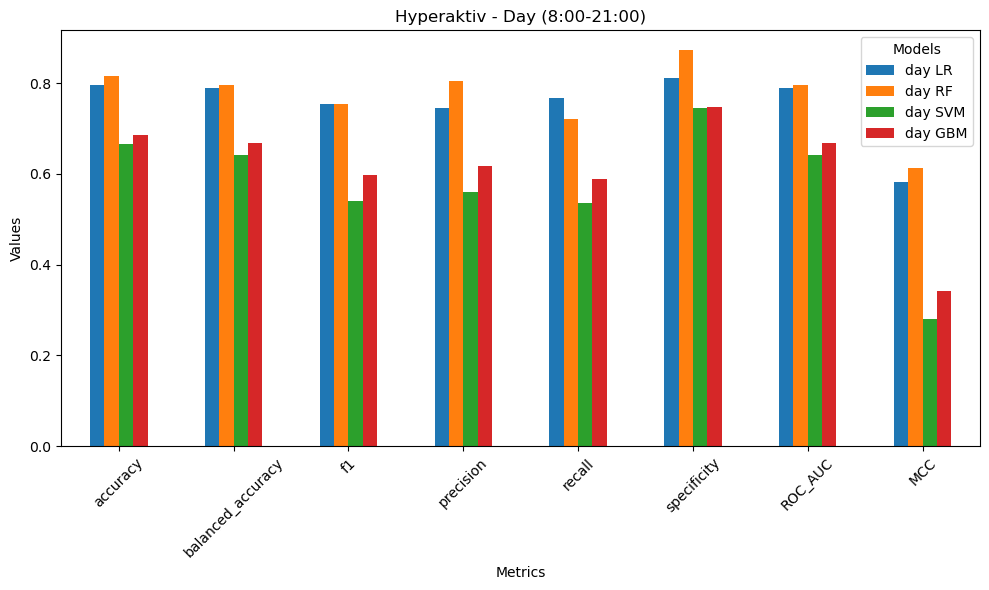

In [54]:
plot_final_results(results_hyperactive_day_8_21, "Hyperaktiv - Day (8:00-21:00)", one_plot=True)

                     day LR    day RF   day SVM   day GBM
accuracy           0.796296  0.851852  0.703704  0.833333
balanced_accuracy  0.788474  0.842641  0.688203  0.820292
f1                 0.753765  0.808231  0.634921  0.787330
precision          0.749206  0.812169  0.657143  0.814815
recall             0.767857  0.809524  0.630952  0.767857
specificity        0.809091  0.875758  0.745455  0.872727
ROC_AUC            0.788474  0.842641  0.688203  0.820292
MCC                0.584042  0.690518  0.390566  0.653379


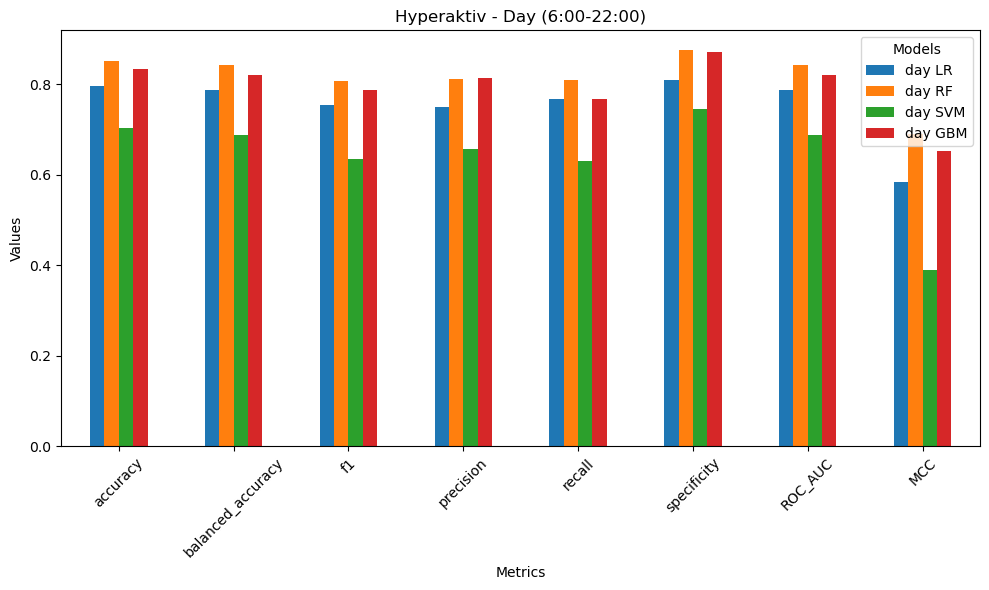

In [53]:
plot_final_results(results_hyperactive_day_6_22, "Hyperaktiv - Day (6:00-22:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.851852  0.907407   0.796296   0.907407
balanced_accuracy  0.845617  0.898268   0.766991   0.898268
f1                 0.814744  0.877778   0.714646   0.877778
precision          0.819444  0.916667   0.850000   0.916667
recall             0.815476  0.857143   0.630952   0.857143
specificity        0.875758  0.939394   0.903030   0.939394
ROC_AUC            0.845617  0.898268   0.766991   0.898268
MCC                0.694067  0.813323   0.581019   0.813323


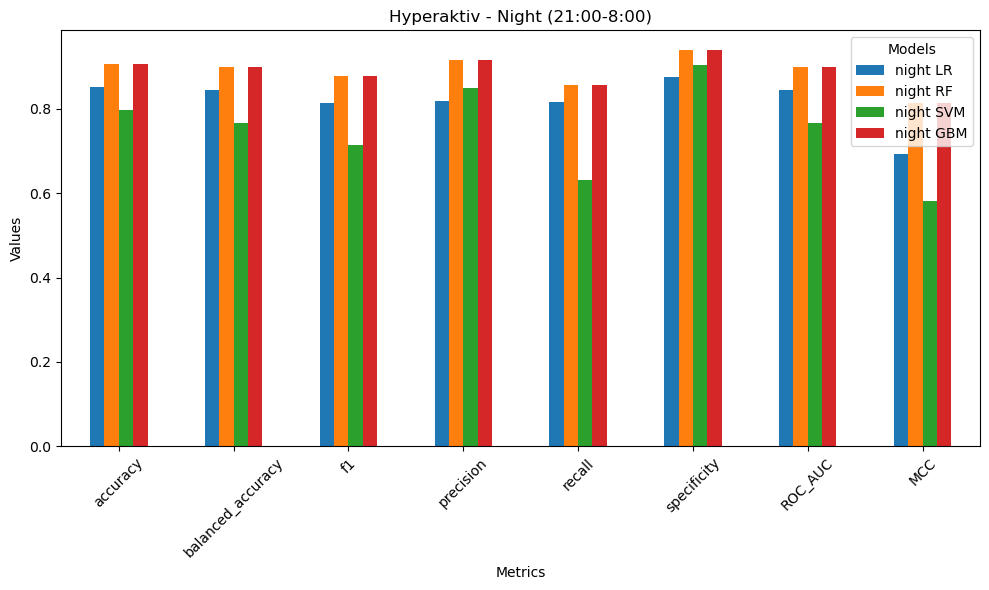

In [52]:
plot_final_results(results_hyperactive_night_8_21, "Hyperaktiv - Night (21:00-8:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.870370  0.814815   0.740741   0.777778
balanced_accuracy  0.867965  0.802165   0.726299   0.772132
f1                 0.841270  0.757835   0.627622   0.728632
precision          0.827381  0.766667   0.722222   0.738095
recall             0.857143  0.761905   0.607143   0.732143
specificity        0.878788  0.842424   0.845455   0.812121
ROC_AUC            0.867965  0.802165   0.726299   0.772132
MCC                0.733145  0.615857   0.471487   0.549220


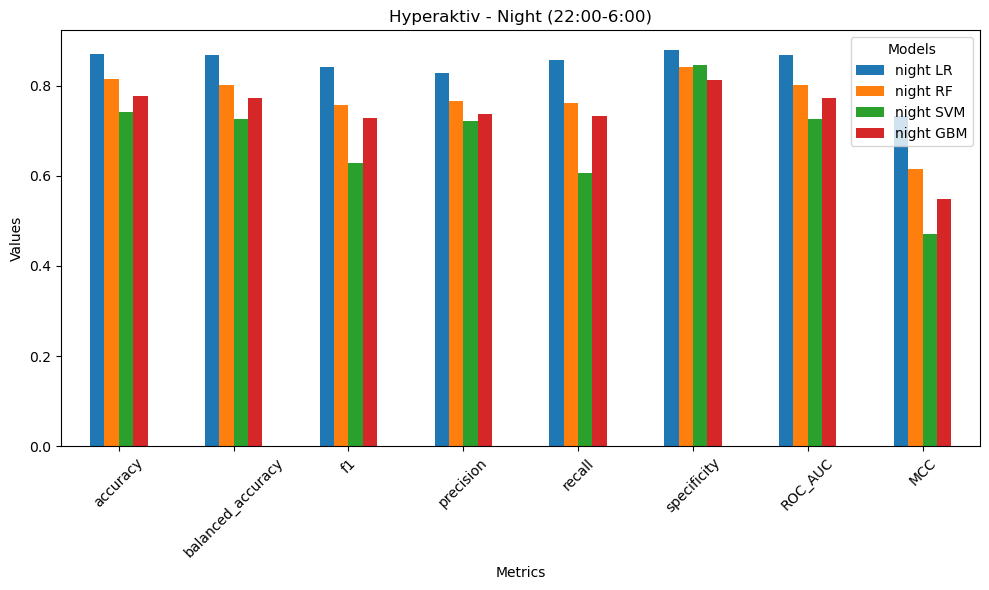

In [55]:
plot_final_results(results_hyperactive_night_6_22, "Hyperaktiv - Night (22:00-6:00)", one_plot=True)

                     24h LR    24h RF   24h SVM   24h GBM
accuracy           0.814815  0.796296  0.777778  0.722222
balanced_accuracy  0.819481  0.780141  0.747673  0.715043
f1                 0.784392  0.732601  0.685648  0.665873
precision          0.726984  0.793651  0.833333  0.654762
recall             0.857143  0.684524  0.589286  0.678571
specificity        0.781818  0.875758  0.906061  0.751515
ROC_AUC            0.819481  0.780141  0.747673  0.715043
MCC                0.634090  0.576841  0.542123  0.428775


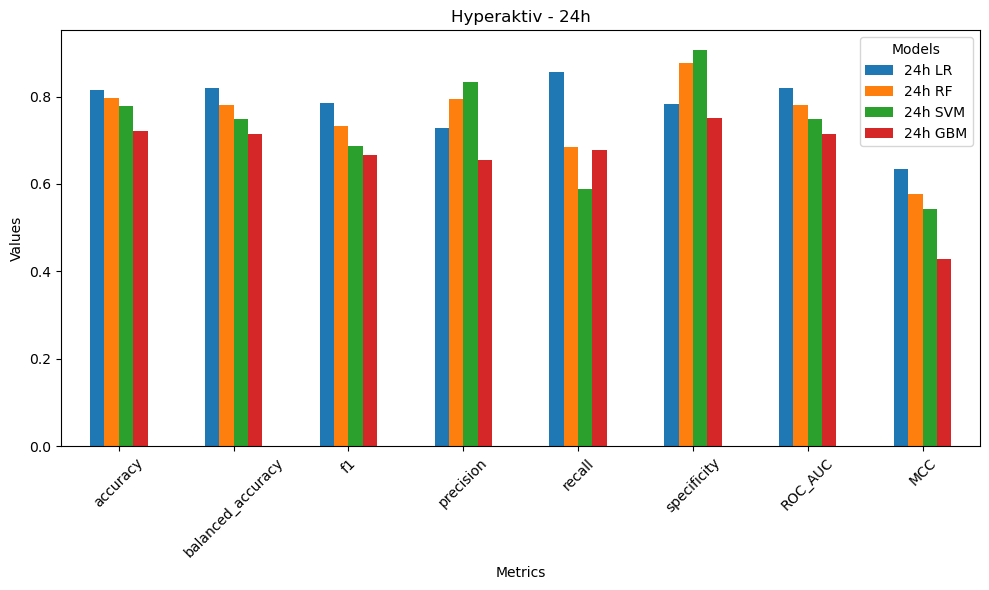

In [56]:
plot_final_results(results_hyperactive_full_24h, "Hyperaktiv - 24h", one_plot=True)

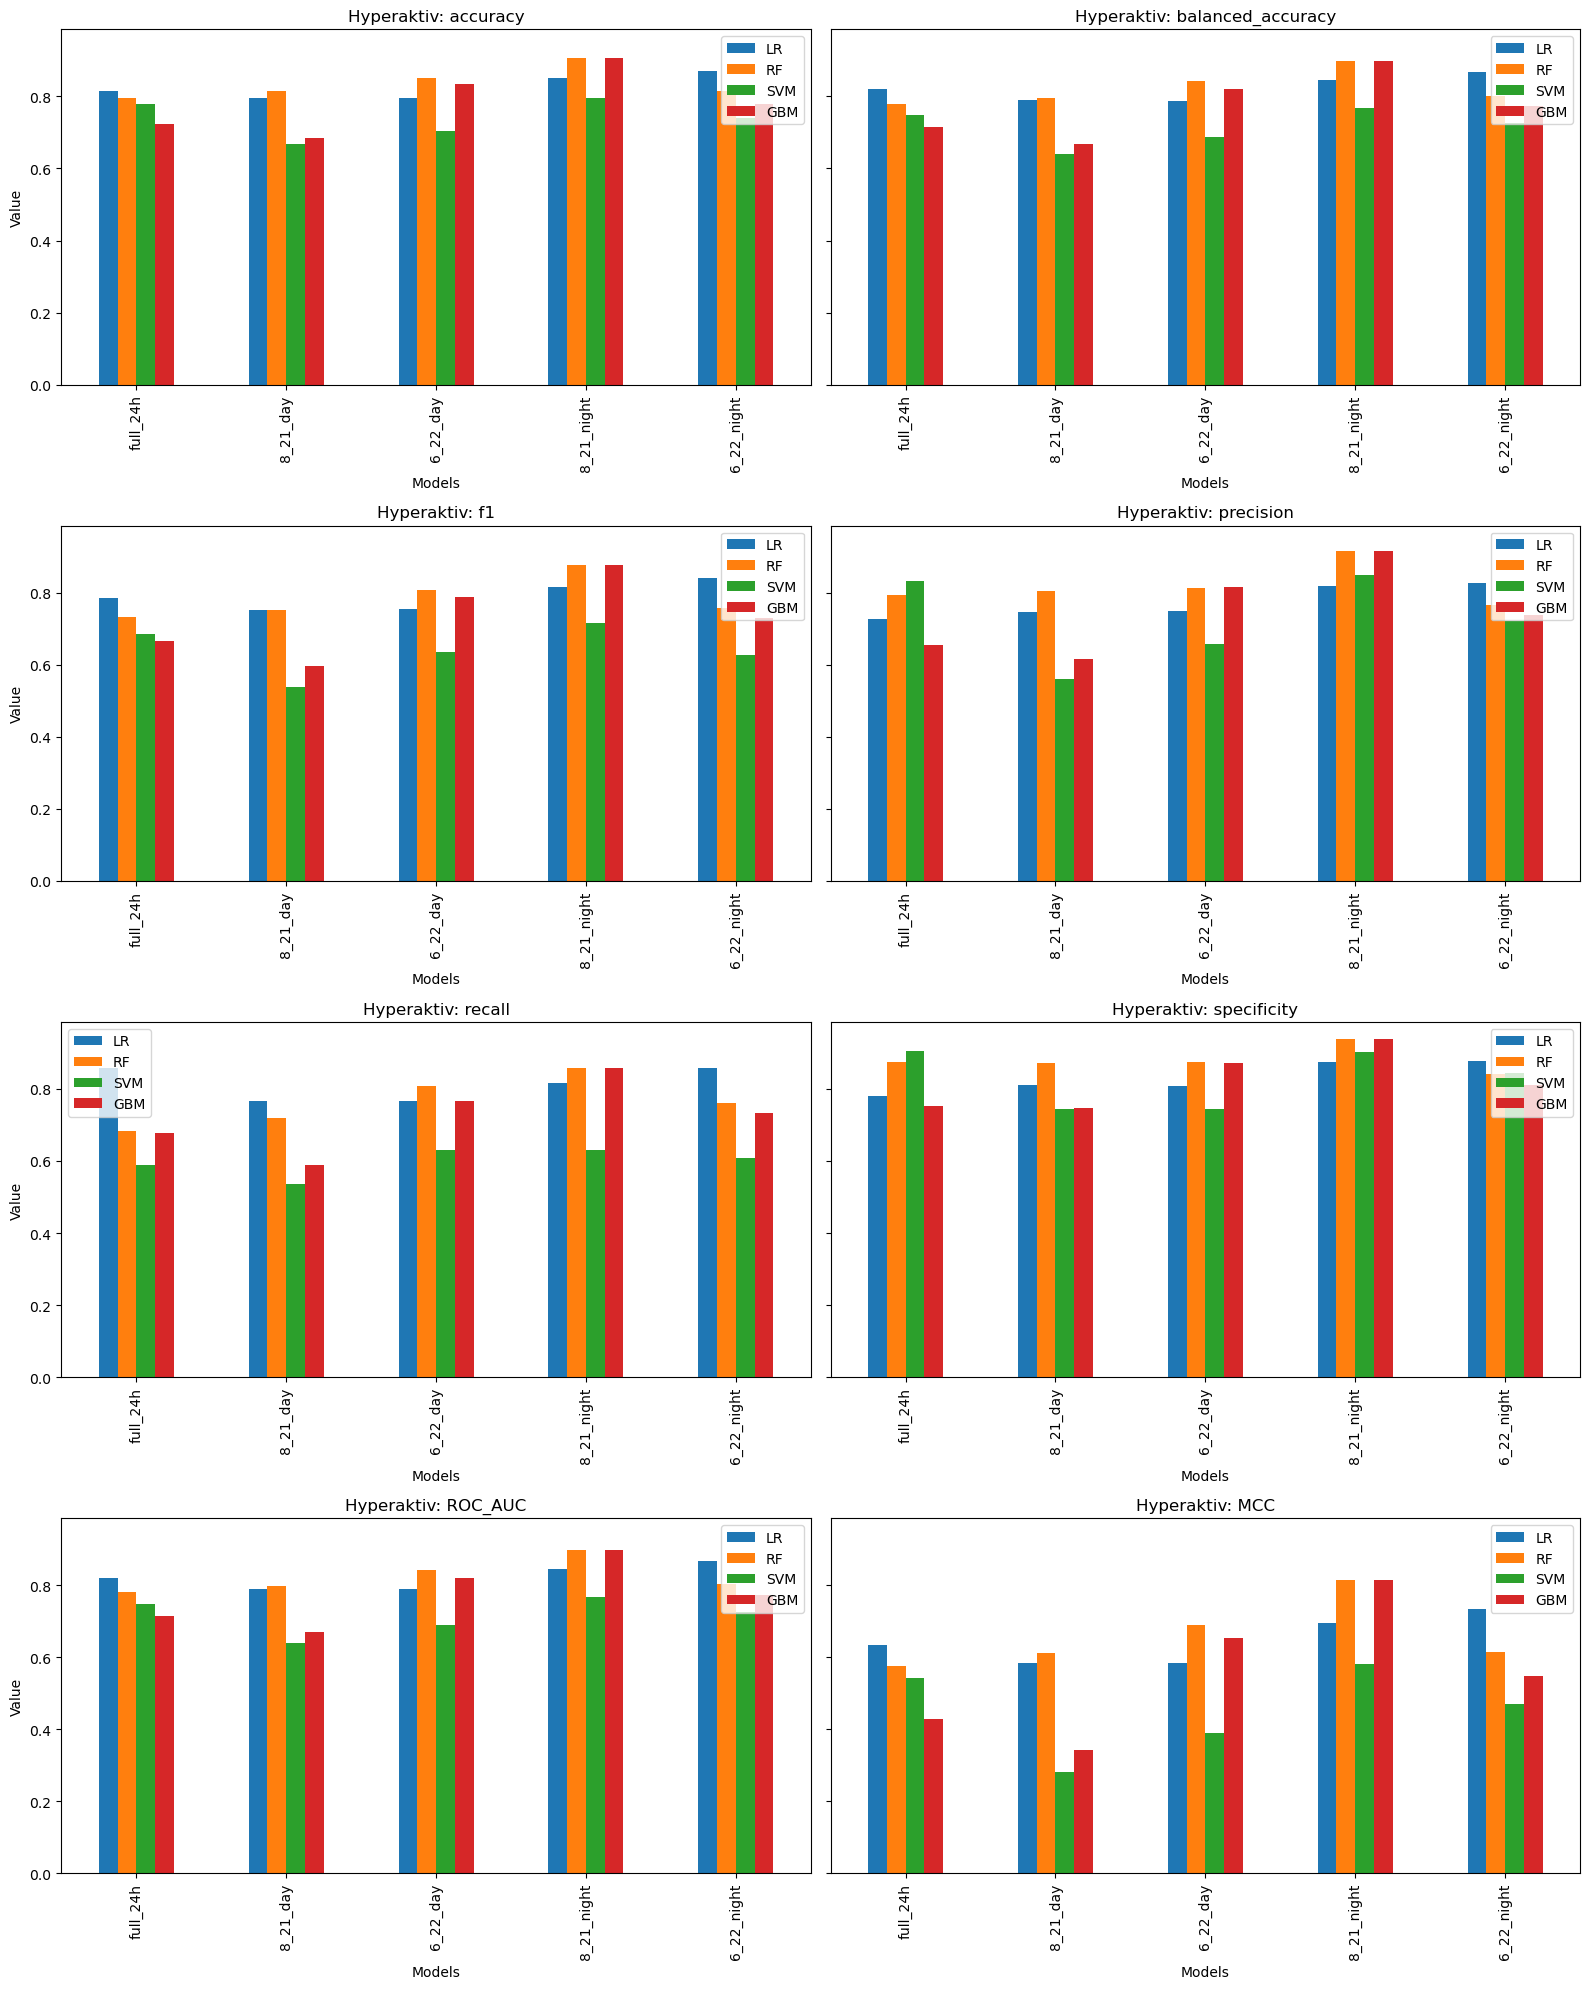

In [13]:
hyperaktiv_results = plot_model_comparison(all_models_results["hyperactiv"], "Hyperaktiv", figsize=(16, 20))

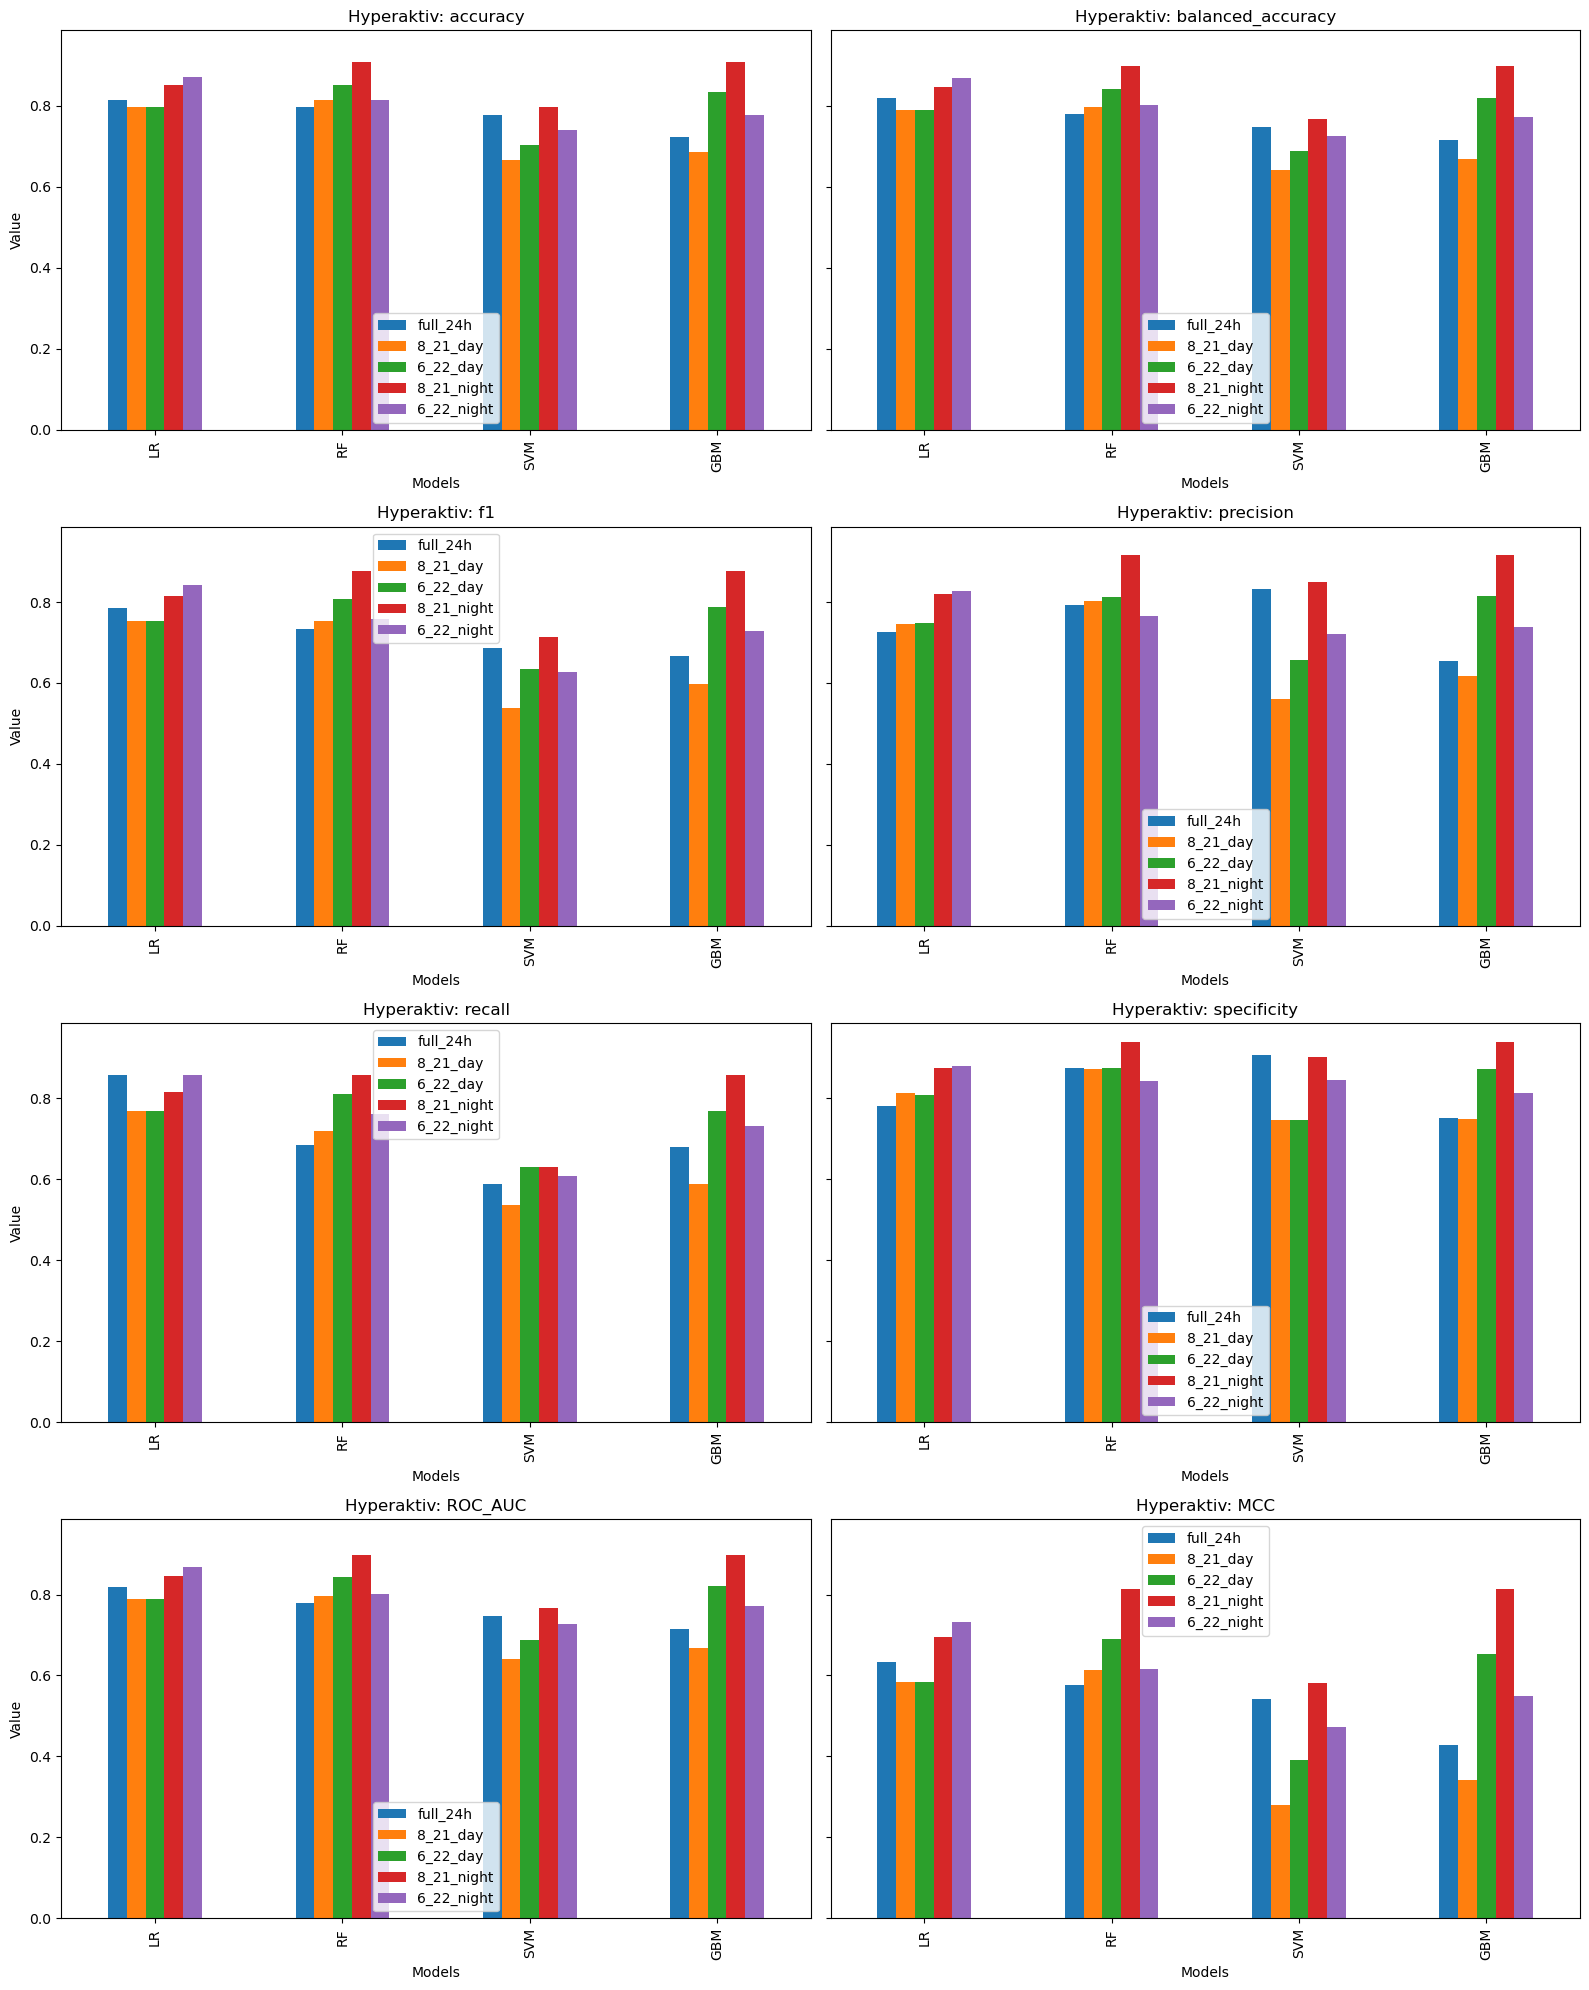

In [58]:
plot_day_night_full_comparison(all_models_results["hyperactiv"], "Hyperaktiv", figsize=(16, 20))

In [33]:
comparison_tables_hyperaktiv = create_comparison_table(all_models_results['hyperactiv'])

In [35]:
comparison_tables_hyperaktiv['full_24h']

,LR,RF,SVM,GBM
accuracy,0.814815,0.796296,0.777778,0.722222
balanced_accuracy,0.819481,0.780141,0.747673,0.715043
f1,0.784392,0.732601,0.685648,0.665873
precision,0.726984,0.793651,0.833333,0.654762
recall,0.857143,0.684524,0.589286,0.678571
specificity,0.781818,0.875758,0.906061,0.751515
ROC_AUC,0.819481,0.780141,0.747673,0.715043
MCC,0.634090,0.576841,0.542123,0.428775


In [36]:
comparison_tables_hyperaktiv['8_21_day']

,LR,RF,SVM,GBM
accuracy,0.796296,0.814815,0.666667,0.685185
balanced_accuracy,0.789989,0.796483,0.640584,0.668885
f1,0.753142,0.753142,0.539239,0.597222
precision,0.745370,0.803704,0.561111,0.616667
recall,0.767857,0.720238,0.535714,0.589286
specificity,0.812121,0.872727,0.745455,0.748485
ROC_AUC,0.789989,0.796483,0.640584,0.668885
MCC,0.582893,0.612825,0.280791,0.342255


In [37]:
comparison_tables_hyperaktiv['6_22_day']

,LR,RF,SVM,GBM
accuracy,0.796296,0.851852,0.703704,0.833333
balanced_accuracy,0.788474,0.842641,0.688203,0.820292
f1,0.753765,0.808231,0.634921,0.787330
precision,0.749206,0.812169,0.657143,0.814815
recall,0.767857,0.809524,0.630952,0.767857
specificity,0.809091,0.875758,0.745455,0.872727
ROC_AUC,0.788474,0.842641,0.688203,0.820292
MCC,0.584042,0.690518,0.390566,0.653379


In [39]:
comparison_tables_hyperaktiv['8_21_night']

,LR,RF,SVM,GBM
accuracy,0.851852,0.907407,0.796296,0.907407
balanced_accuracy,0.845617,0.898268,0.766991,0.898268
f1,0.814744,0.877778,0.714646,0.877778
precision,0.819444,0.916667,0.850000,0.916667
recall,0.815476,0.857143,0.630952,0.857143
specificity,0.875758,0.939394,0.903030,0.939394
ROC_AUC,0.845617,0.898268,0.766991,0.898268
MCC,0.694067,0.813323,0.581019,0.813323


In [40]:
comparison_tables_hyperaktiv['6_22_night']

,LR,RF,SVM,GBM
accuracy,0.870370,0.814815,0.740741,0.777778
balanced_accuracy,0.867965,0.802165,0.726299,0.772132
f1,0.841270,0.757835,0.627622,0.728632
precision,0.827381,0.766667,0.722222,0.738095
recall,0.857143,0.761905,0.607143,0.732143
specificity,0.878788,0.842424,0.845455,0.812121
ROC_AUC,0.867965,0.802165,0.726299,0.772132
MCC,0.733145,0.615857,0.471487,0.549220


### Depresjon

In [16]:
path_to_depresjon_results_folder = os.path.join(".", "results", "depresjon")

In [17]:
results_depresjon_day_8_21 = get_dataset_part_results(path_to_depresjon_results_folder, day_8_21_models_scores)
results_depresjon_day_6_22 = get_dataset_part_results(path_to_depresjon_results_folder, day_6_22_models_scores)
results_depresjon_night_8_21 = get_dataset_part_results(path_to_depresjon_results_folder, night_8_21_models_scores)
results_depresjon_night_6_22 = get_dataset_part_results(path_to_depresjon_results_folder, night_6_22_models_scores)
results_depresjon_full_24h = get_dataset_part_results(path_to_depresjon_results_folder, full_24h_models_scores)

                     day LR    day RF   day SVM   day GBM
accuracy           0.707602  0.743665  0.689084  0.688109
balanced_accuracy  0.697132  0.733442  0.669156  0.690639
f1                 0.645614  0.686966  0.600275  0.663818
precision          0.712121  0.756614  0.652778  0.684848
recall             0.648810  0.654762  0.559524  0.696429
specificity        0.745455  0.812121  0.778788  0.684848
ROC_AUC            0.697132  0.733442  0.669156  0.690639
MCC                0.431185  0.491949  0.351153  0.406532


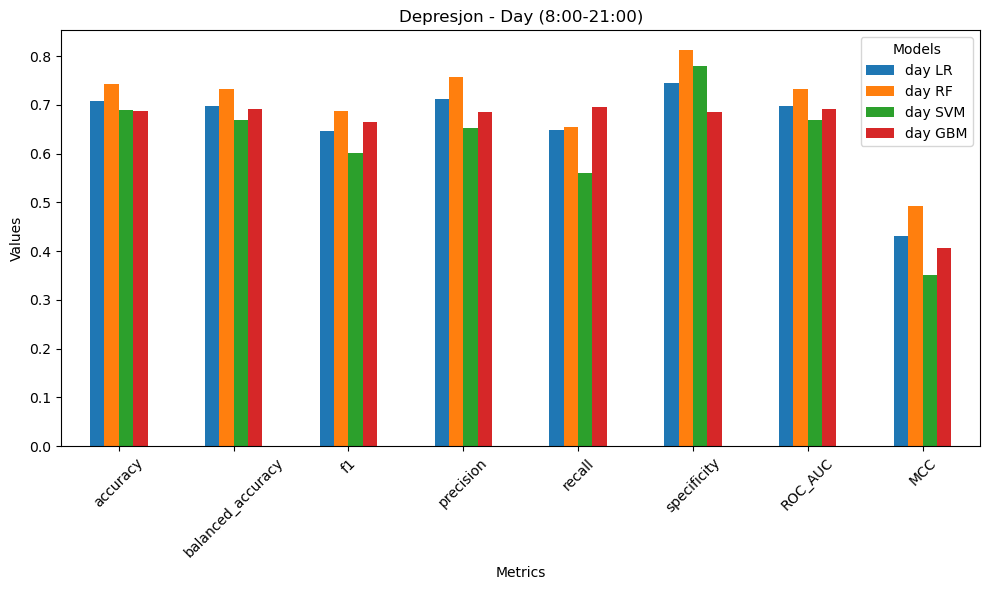

In [59]:
plot_final_results(results_depresjon_day_8_21, "Depresjon - Day (8:00-21:00)", one_plot=True)

                     day LR    day RF   day SVM   day GBM
accuracy           0.707602  0.761209  0.689084  0.688109
balanced_accuracy  0.697132  0.754275  0.669156  0.690639
f1                 0.645614  0.716270  0.600275  0.663818
precision          0.712121  0.756614  0.652778  0.684848
recall             0.648810  0.696429  0.559524  0.696429
specificity        0.745455  0.812121  0.778788  0.684848
ROC_AUC            0.697132  0.754275  0.669156  0.690639
MCC                0.431185  0.523903  0.351153  0.406532


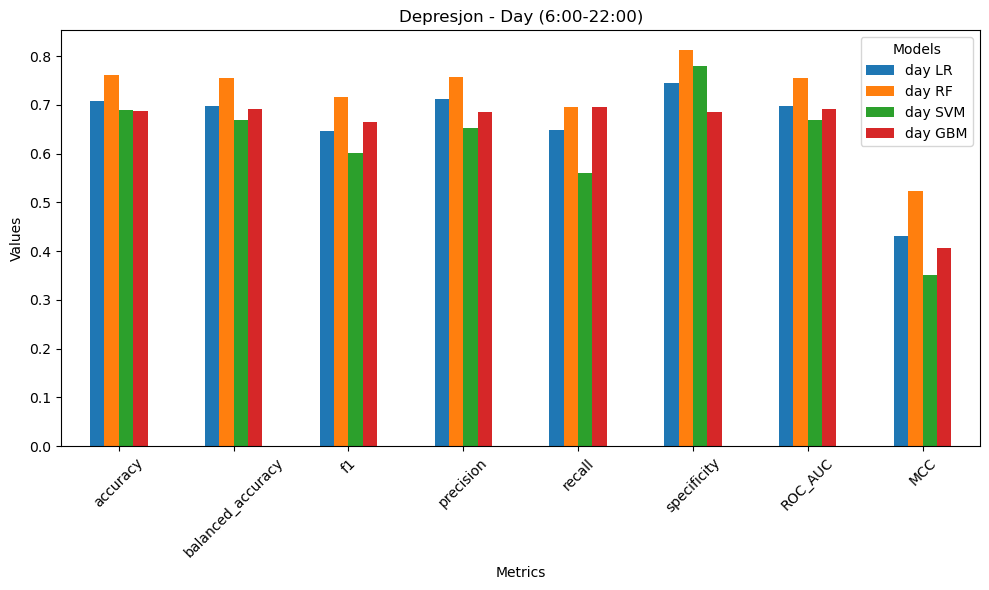

In [60]:
plot_final_results(results_depresjon_day_6_22, "Depresjon - Day (6:00-22:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.708577  0.689084   0.546784   0.654971
balanced_accuracy  0.721320  0.666504   0.527976   0.649026
f1                 0.697596  0.586081   0.437525   0.594444
precision          0.612536  0.687302   0.466667   0.588624
recall             0.821429  0.517857   0.422619   0.607143
specificity        0.621212  0.815152   0.633333   0.690909
ROC_AUC            0.721320  0.666504   0.527976   0.649026
MCC                0.456174  0.358664   0.062041   0.298861


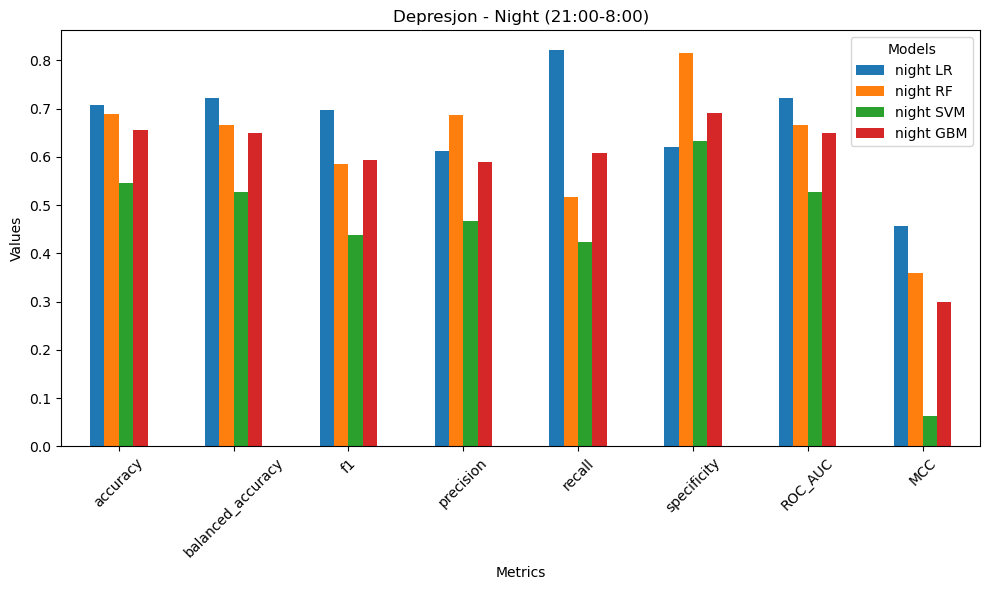

In [61]:
plot_final_results(results_depresjon_night_8_21, "Depresjon - Night (21:00-8:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.708577  0.707602   0.546784   0.654971
balanced_accuracy  0.721320  0.683171   0.527976   0.649026
f1                 0.697596  0.603175   0.437525   0.594444
precision          0.612536  0.753968   0.466667   0.588624
recall             0.821429  0.517857   0.422619   0.607143
specificity        0.621212  0.848485   0.633333   0.690909
ROC_AUC            0.721320  0.683171   0.527976   0.649026
MCC                0.456174  0.409948   0.062041   0.298861


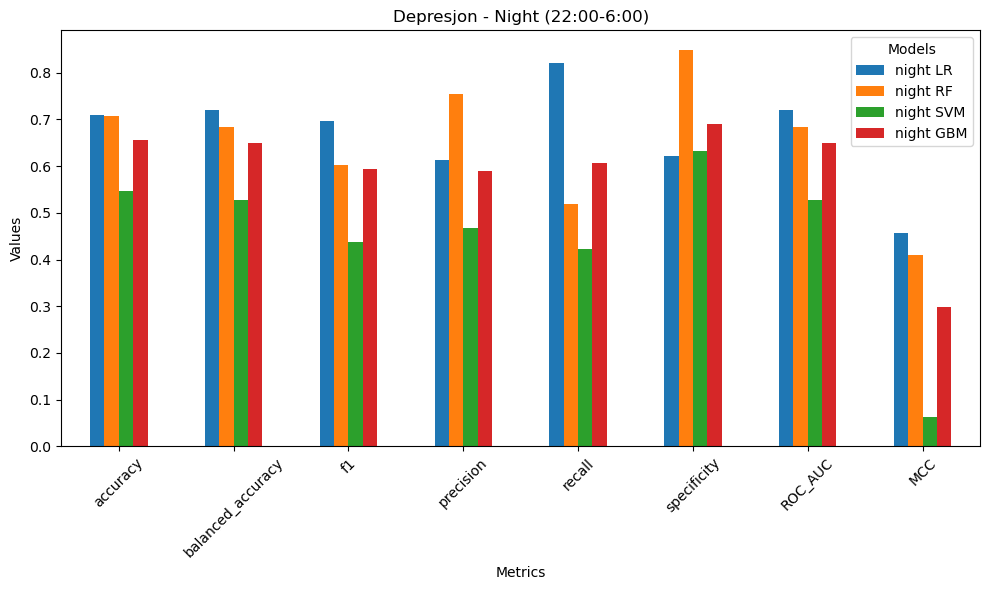

In [62]:
plot_final_results(results_depresjon_night_6_22, "Depresjon - Night (22:00-6:00)", one_plot=True)

                     24h LR    24h RF   24h SVM   24h GBM
accuracy           0.763158  0.596491  0.600390  0.786070
balanced_accuracy  0.732792  0.574513  0.603517  0.729444
f1                 0.658009  0.497354  0.560185  0.638655
precision          0.805556  0.544444  0.518519  0.775510
recall             0.559524  0.470238  0.613095  0.542857
specificity        0.906061  0.678788  0.593939  0.916031
ROC_AUC            0.732792  0.574513  0.603517  0.729444
MCC                0.505546  0.160477  0.203477  0.509180


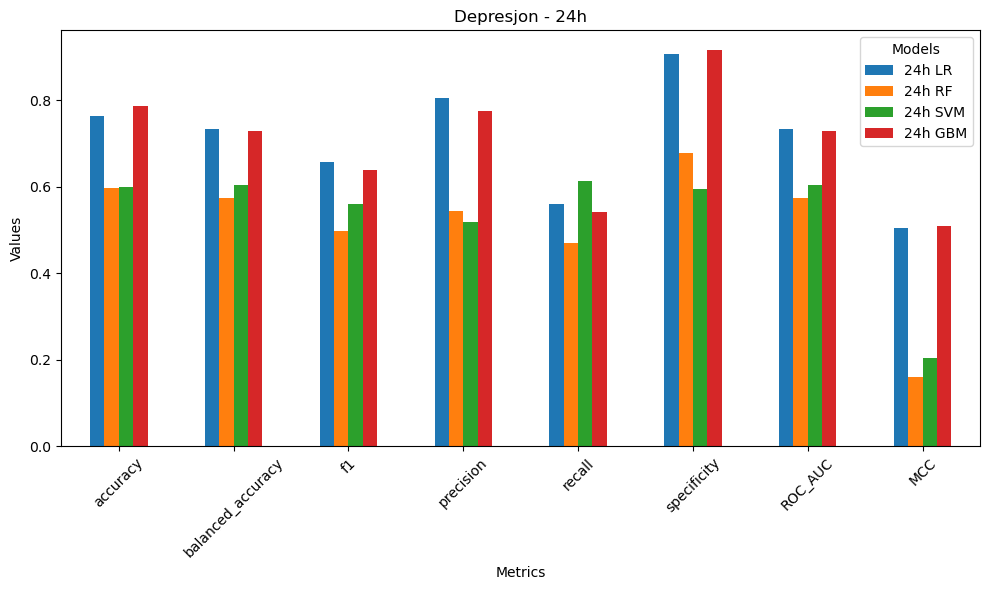

In [63]:
plot_final_results(results_depresjon_full_24h, "Depresjon - 24h", one_plot=True)

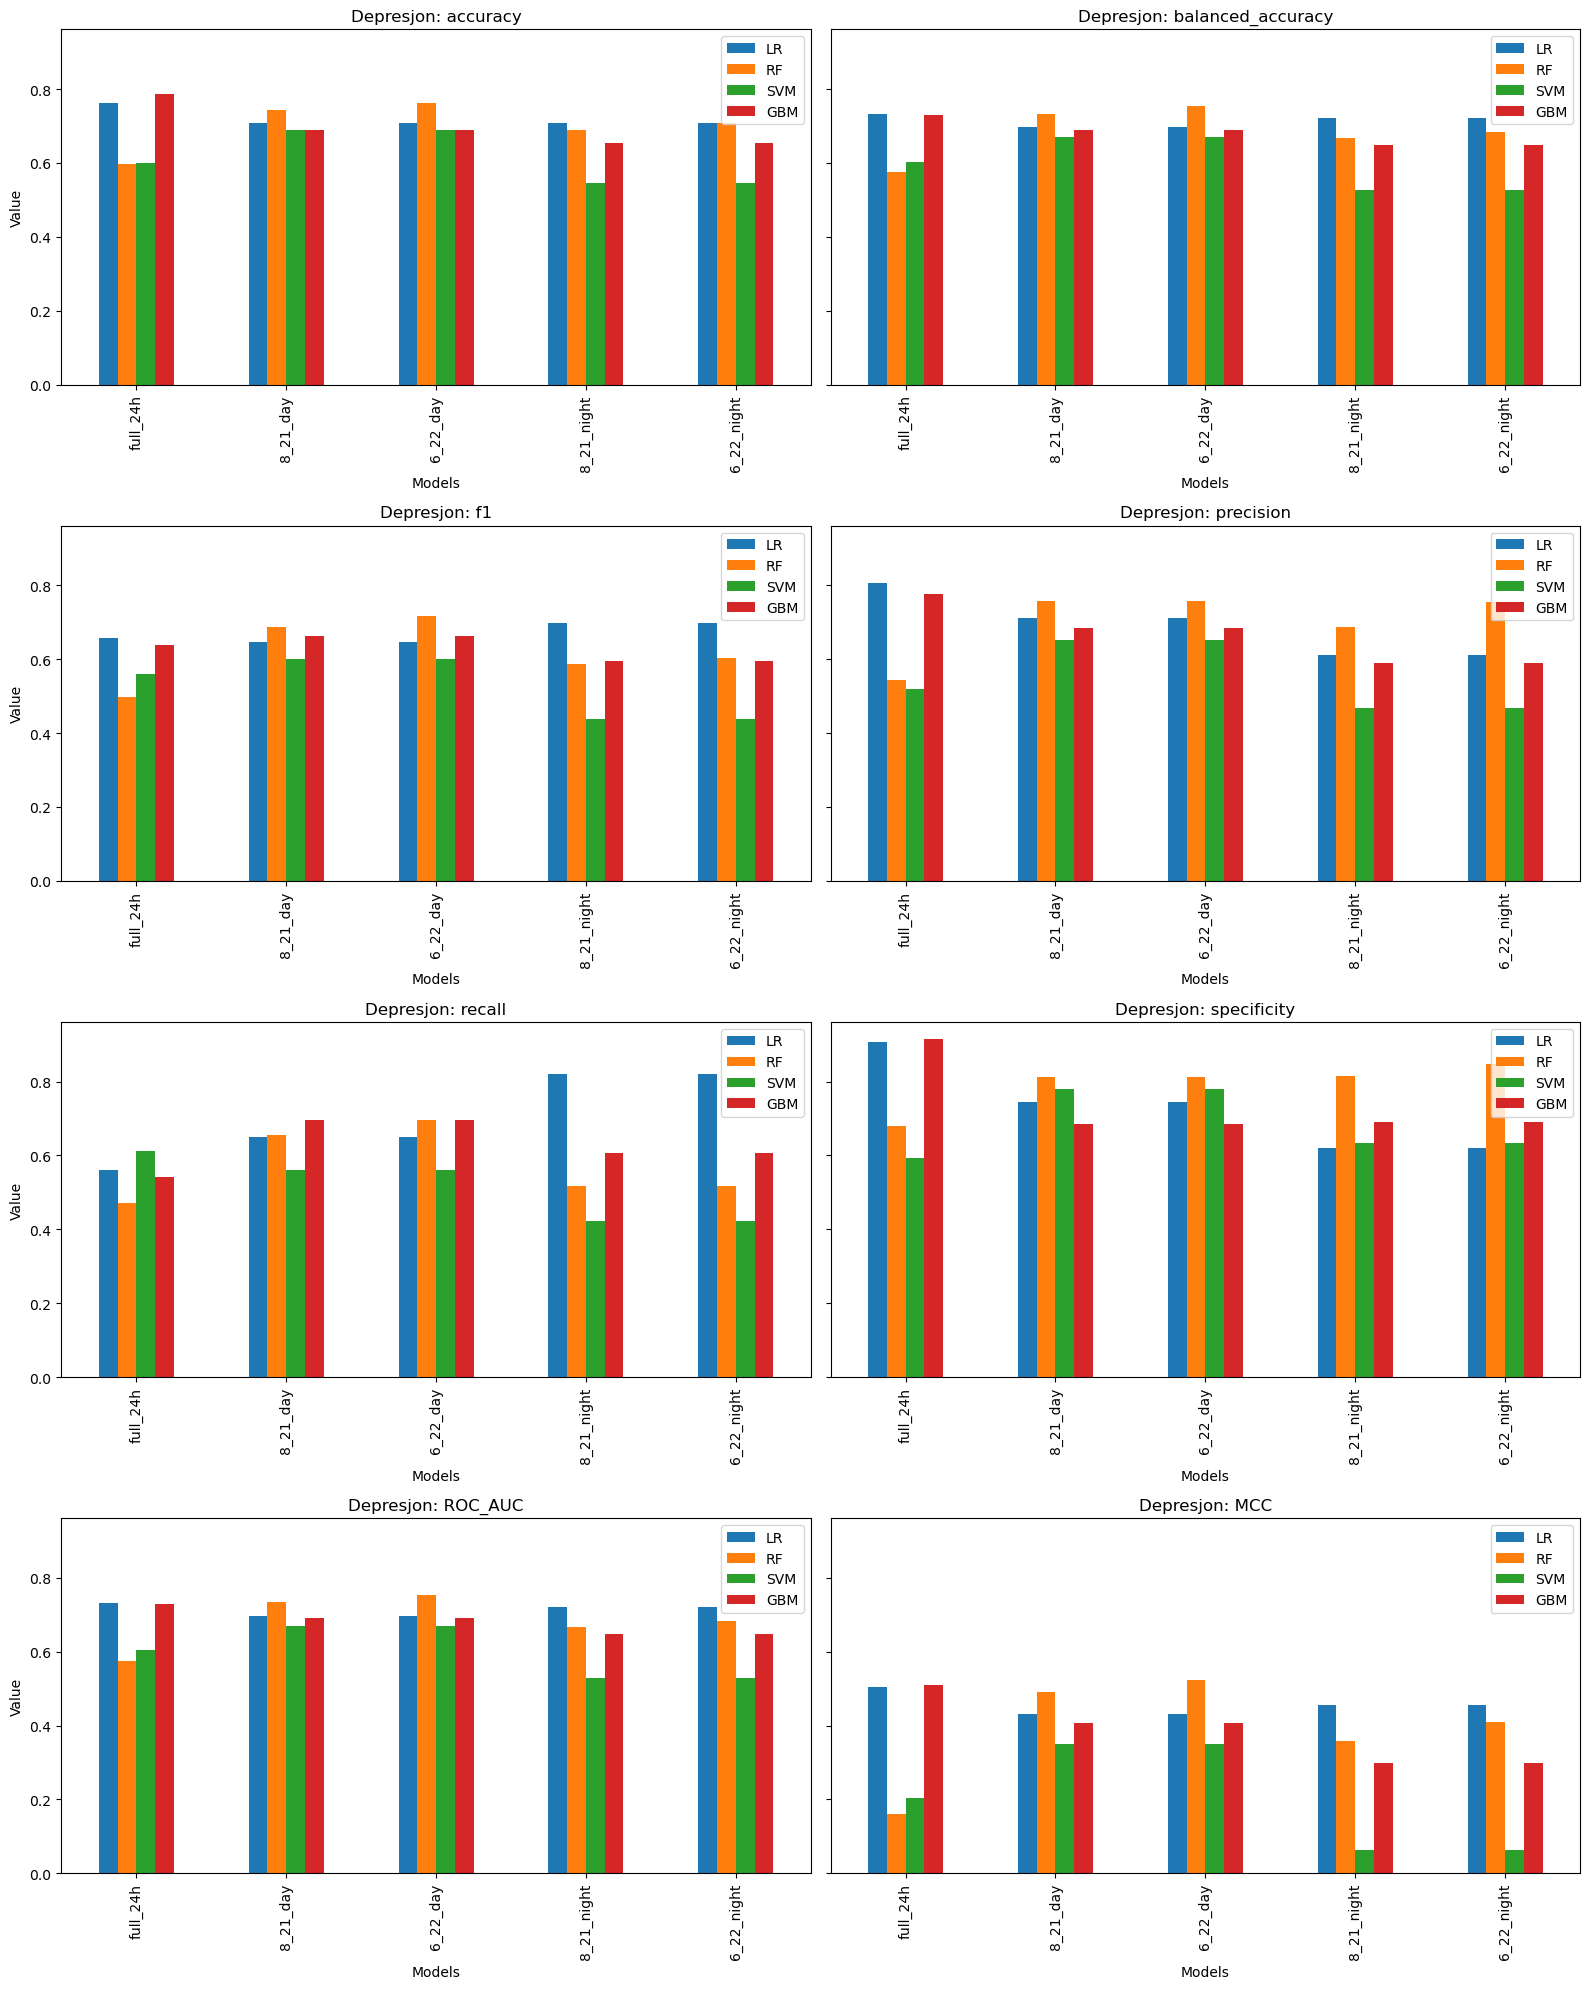

In [23]:
plot_model_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

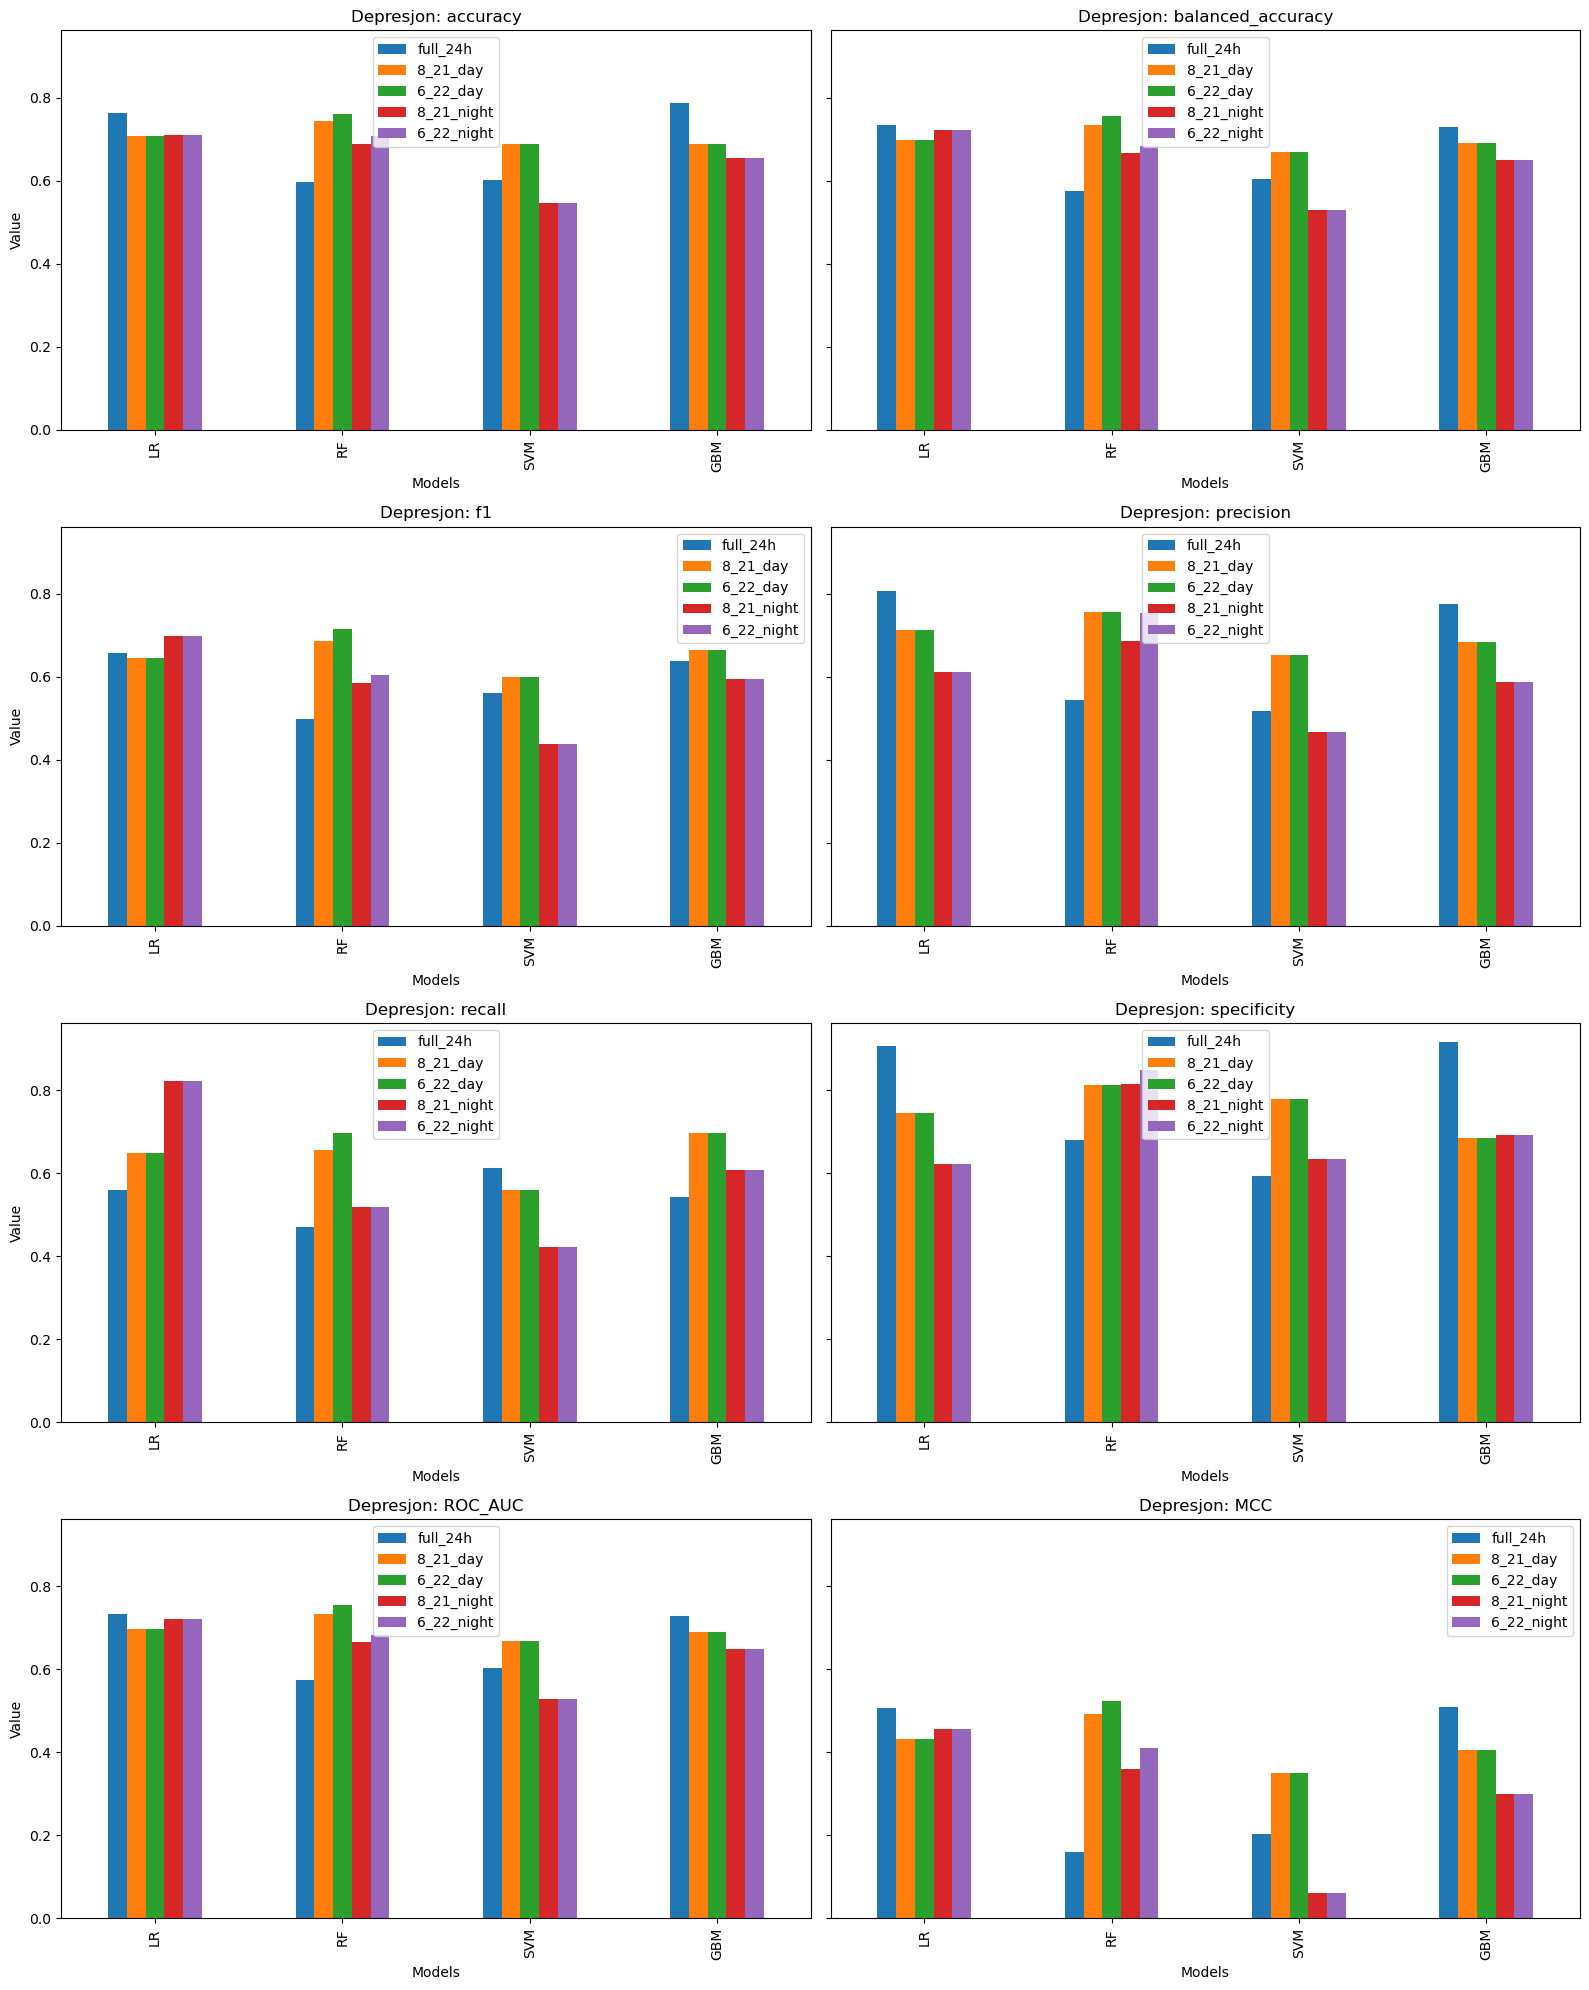

In [64]:
plot_day_night_full_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

In [42]:
comparison_tables_depresjon = create_comparison_table(all_models_results['depresjon'])

In [43]:
comparison_tables_depresjon['full_24h']

,LR,RF,SVM,GBM
accuracy,0.763158,0.596491,0.600390,0.786070
balanced_accuracy,0.732792,0.574513,0.603517,0.729444
f1,0.658009,0.497354,0.560185,0.638655
precision,0.805556,0.544444,0.518519,0.775510
recall,0.559524,0.470238,0.613095,0.542857
specificity,0.906061,0.678788,0.593939,0.916031
ROC_AUC,0.732792,0.574513,0.603517,0.729444
MCC,0.505546,0.160477,0.203477,0.509180


In [44]:
comparison_tables_depresjon['8_21_day']

,LR,RF,SVM,GBM
accuracy,0.707602,0.743665,0.689084,0.688109
balanced_accuracy,0.697132,0.733442,0.669156,0.690639
f1,0.645614,0.686966,0.600275,0.663818
precision,0.712121,0.756614,0.652778,0.684848
recall,0.648810,0.654762,0.559524,0.696429
specificity,0.745455,0.812121,0.778788,0.684848
ROC_AUC,0.697132,0.733442,0.669156,0.690639
MCC,0.431185,0.491949,0.351153,0.406532


In [45]:
comparison_tables_depresjon['6_22_day']

,LR,RF,SVM,GBM
accuracy,0.707602,0.761209,0.689084,0.688109
balanced_accuracy,0.697132,0.754275,0.669156,0.690639
f1,0.645614,0.716270,0.600275,0.663818
precision,0.712121,0.756614,0.652778,0.684848
recall,0.648810,0.696429,0.559524,0.696429
specificity,0.745455,0.812121,0.778788,0.684848
ROC_AUC,0.697132,0.754275,0.669156,0.690639
MCC,0.431185,0.523903,0.351153,0.406532


In [46]:
comparison_tables_depresjon['8_21_night']

,LR,RF,SVM,GBM
accuracy,0.708577,0.689084,0.546784,0.654971
balanced_accuracy,0.721320,0.666504,0.527976,0.649026
f1,0.697596,0.586081,0.437525,0.594444
precision,0.612536,0.687302,0.466667,0.588624
recall,0.821429,0.517857,0.422619,0.607143
specificity,0.621212,0.815152,0.633333,0.690909
ROC_AUC,0.721320,0.666504,0.527976,0.649026
MCC,0.456174,0.358664,0.062041,0.298861


In [47]:
comparison_tables_depresjon['6_22_night']

,LR,RF,SVM,GBM
accuracy,0.708577,0.707602,0.546784,0.654971
balanced_accuracy,0.721320,0.683171,0.527976,0.649026
f1,0.697596,0.603175,0.437525,0.594444
precision,0.612536,0.753968,0.466667,0.588624
recall,0.821429,0.517857,0.422619,0.607143
specificity,0.621212,0.848485,0.633333,0.690909
ROC_AUC,0.721320,0.683171,0.527976,0.649026
MCC,0.456174,0.409948,0.062041,0.298861


### Psykose

In [25]:
path_to_psykose_results_folder = os.path.join(".", "results", "psykose")

In [26]:
results_psykose_day_8_21 = get_dataset_part_results(path_to_psykose_results_folder, day_8_21_models_scores)
results_psykose_day_6_22 = get_dataset_part_results(path_to_psykose_results_folder, day_6_22_models_scores)
results_psykose_night_8_21 = get_dataset_part_results(path_to_psykose_results_folder, night_8_21_models_scores)
results_psykose_night_6_22 = get_dataset_part_results(path_to_psykose_results_folder, night_6_22_models_scores)
results_psykose_full_24h = get_dataset_part_results(path_to_psykose_results_folder, full_24h_models_scores)

                     day LR    day RF   day SVM   day GBM
accuracy           0.796296  0.796296  0.666667  0.685185
balanced_accuracy  0.789989  0.781331  0.640584  0.668885
f1                 0.753142  0.734827  0.539239  0.597222
precision          0.745370  0.764021  0.561111  0.616667
recall             0.767857  0.720238  0.535714  0.589286
specificity        0.812121  0.842424  0.745455  0.748485
ROC_AUC            0.789989  0.781331  0.640584  0.668885
MCC                0.582893  0.575429  0.280791  0.342255


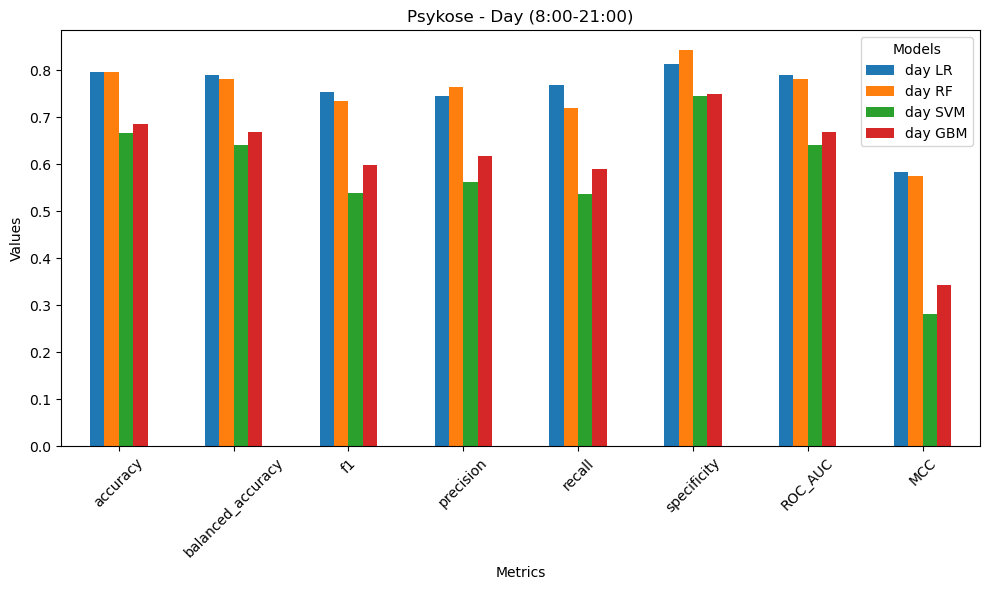

In [65]:
plot_final_results(results_psykose_day_8_21, "Psykose - Day (8:00-21:00)", one_plot=True)

                     day LR    day RF   day SVM   day GBM
accuracy           0.796296  0.814815  0.666667  0.685185
balanced_accuracy  0.789989  0.796483  0.640584  0.668885
f1                 0.753142  0.753142  0.539239  0.597222
precision          0.745370  0.803704  0.561111  0.616667
recall             0.767857  0.720238  0.535714  0.589286
specificity        0.812121  0.872727  0.745455  0.748485
ROC_AUC            0.789989  0.796483  0.640584  0.668885
MCC                0.582893  0.612825  0.280791  0.342255


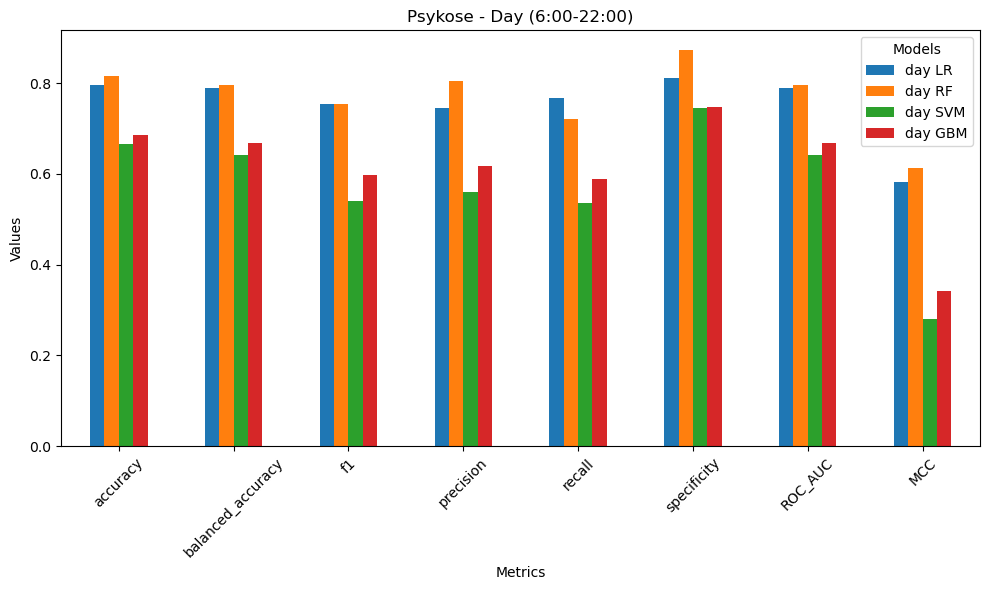

In [66]:
plot_final_results(results_psykose_day_6_22, "Psykose - Day (6:00-22:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.851852  0.907407   0.796296   0.907407
balanced_accuracy  0.845617  0.898268   0.766991   0.898268
f1                 0.814744  0.877778   0.714646   0.877778
precision          0.819444  0.916667   0.850000   0.916667
recall             0.815476  0.857143   0.630952   0.857143
specificity        0.875758  0.939394   0.903030   0.939394
ROC_AUC            0.845617  0.898268   0.766991   0.898268
MCC                0.694067  0.813323   0.581019   0.813323


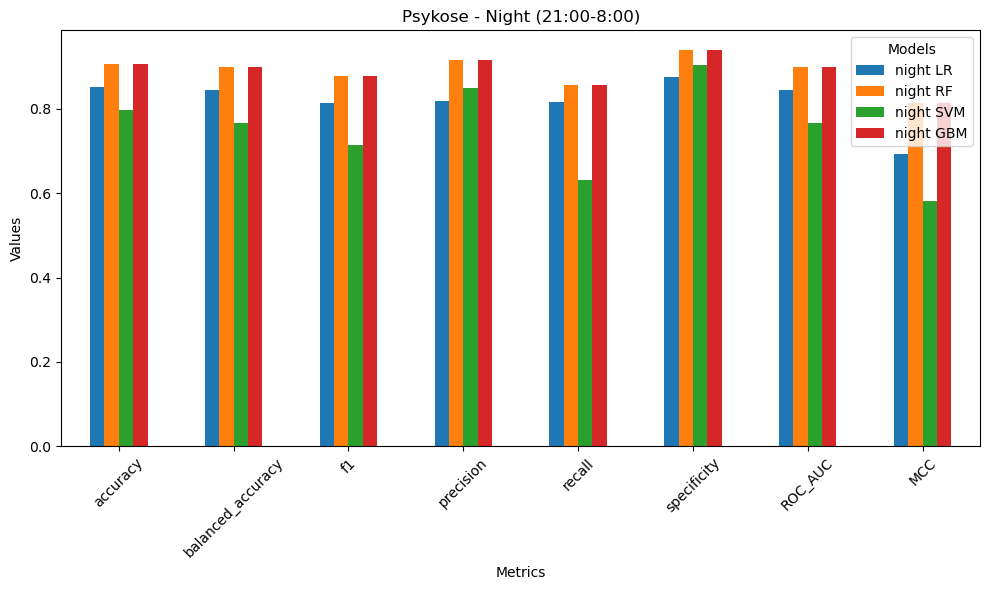

In [67]:
plot_final_results(results_psykose_night_8_21, "Psykose - Night (21:00-8:00)", one_plot=True)

                   night LR  night RF  night SVM  night GBM
accuracy           0.851852  0.907407   0.796296   0.907407
balanced_accuracy  0.845617  0.898268   0.766991   0.898268
f1                 0.814744  0.877778   0.714646   0.877778
precision          0.819444  0.916667   0.850000   0.916667
recall             0.815476  0.857143   0.630952   0.857143
specificity        0.875758  0.939394   0.903030   0.939394
ROC_AUC            0.845617  0.898268   0.766991   0.898268
MCC                0.694067  0.813323   0.581019   0.813323


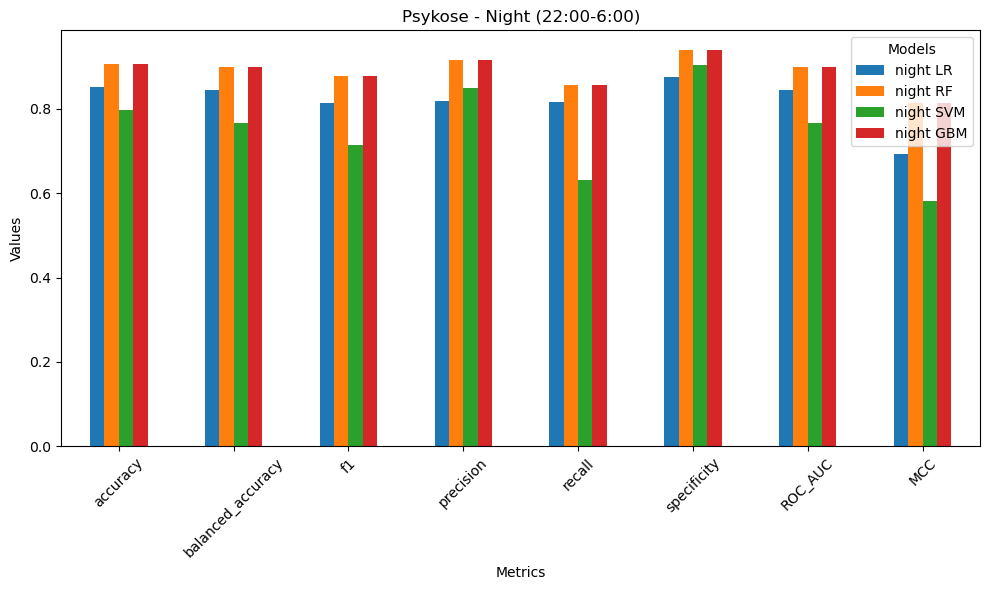

In [68]:
plot_final_results(results_psykose_night_6_22, "Psykose - Night (22:00-6:00)", one_plot=True)

                     24h LR    24h RF   24h SVM   24h GBM
accuracy           0.814815  0.759259  0.777778  0.722222
balanced_accuracy  0.819481  0.735498  0.747673  0.715043
f1                 0.784392  0.665446  0.685648  0.665873
precision          0.726984  0.771429  0.833333  0.654762
recall             0.857143  0.595238  0.589286  0.678571
specificity        0.781818  0.875758  0.906061  0.751515
ROC_AUC            0.819481  0.735498  0.747673  0.715043
MCC                0.634090  0.499742  0.542123  0.428775


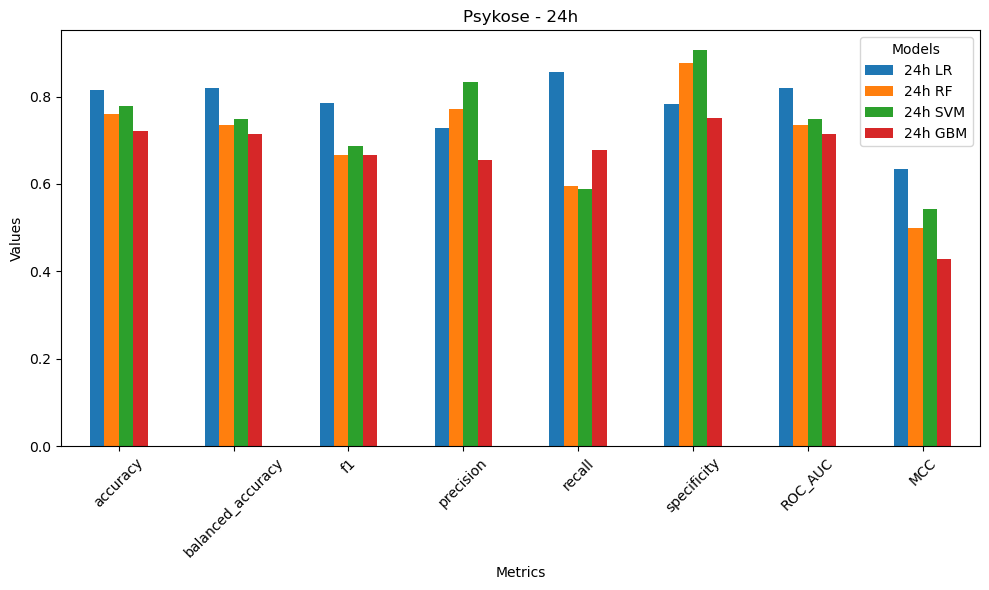

In [69]:
plot_final_results(results_psykose_full_24h, "Psykose - 24h", one_plot=True)

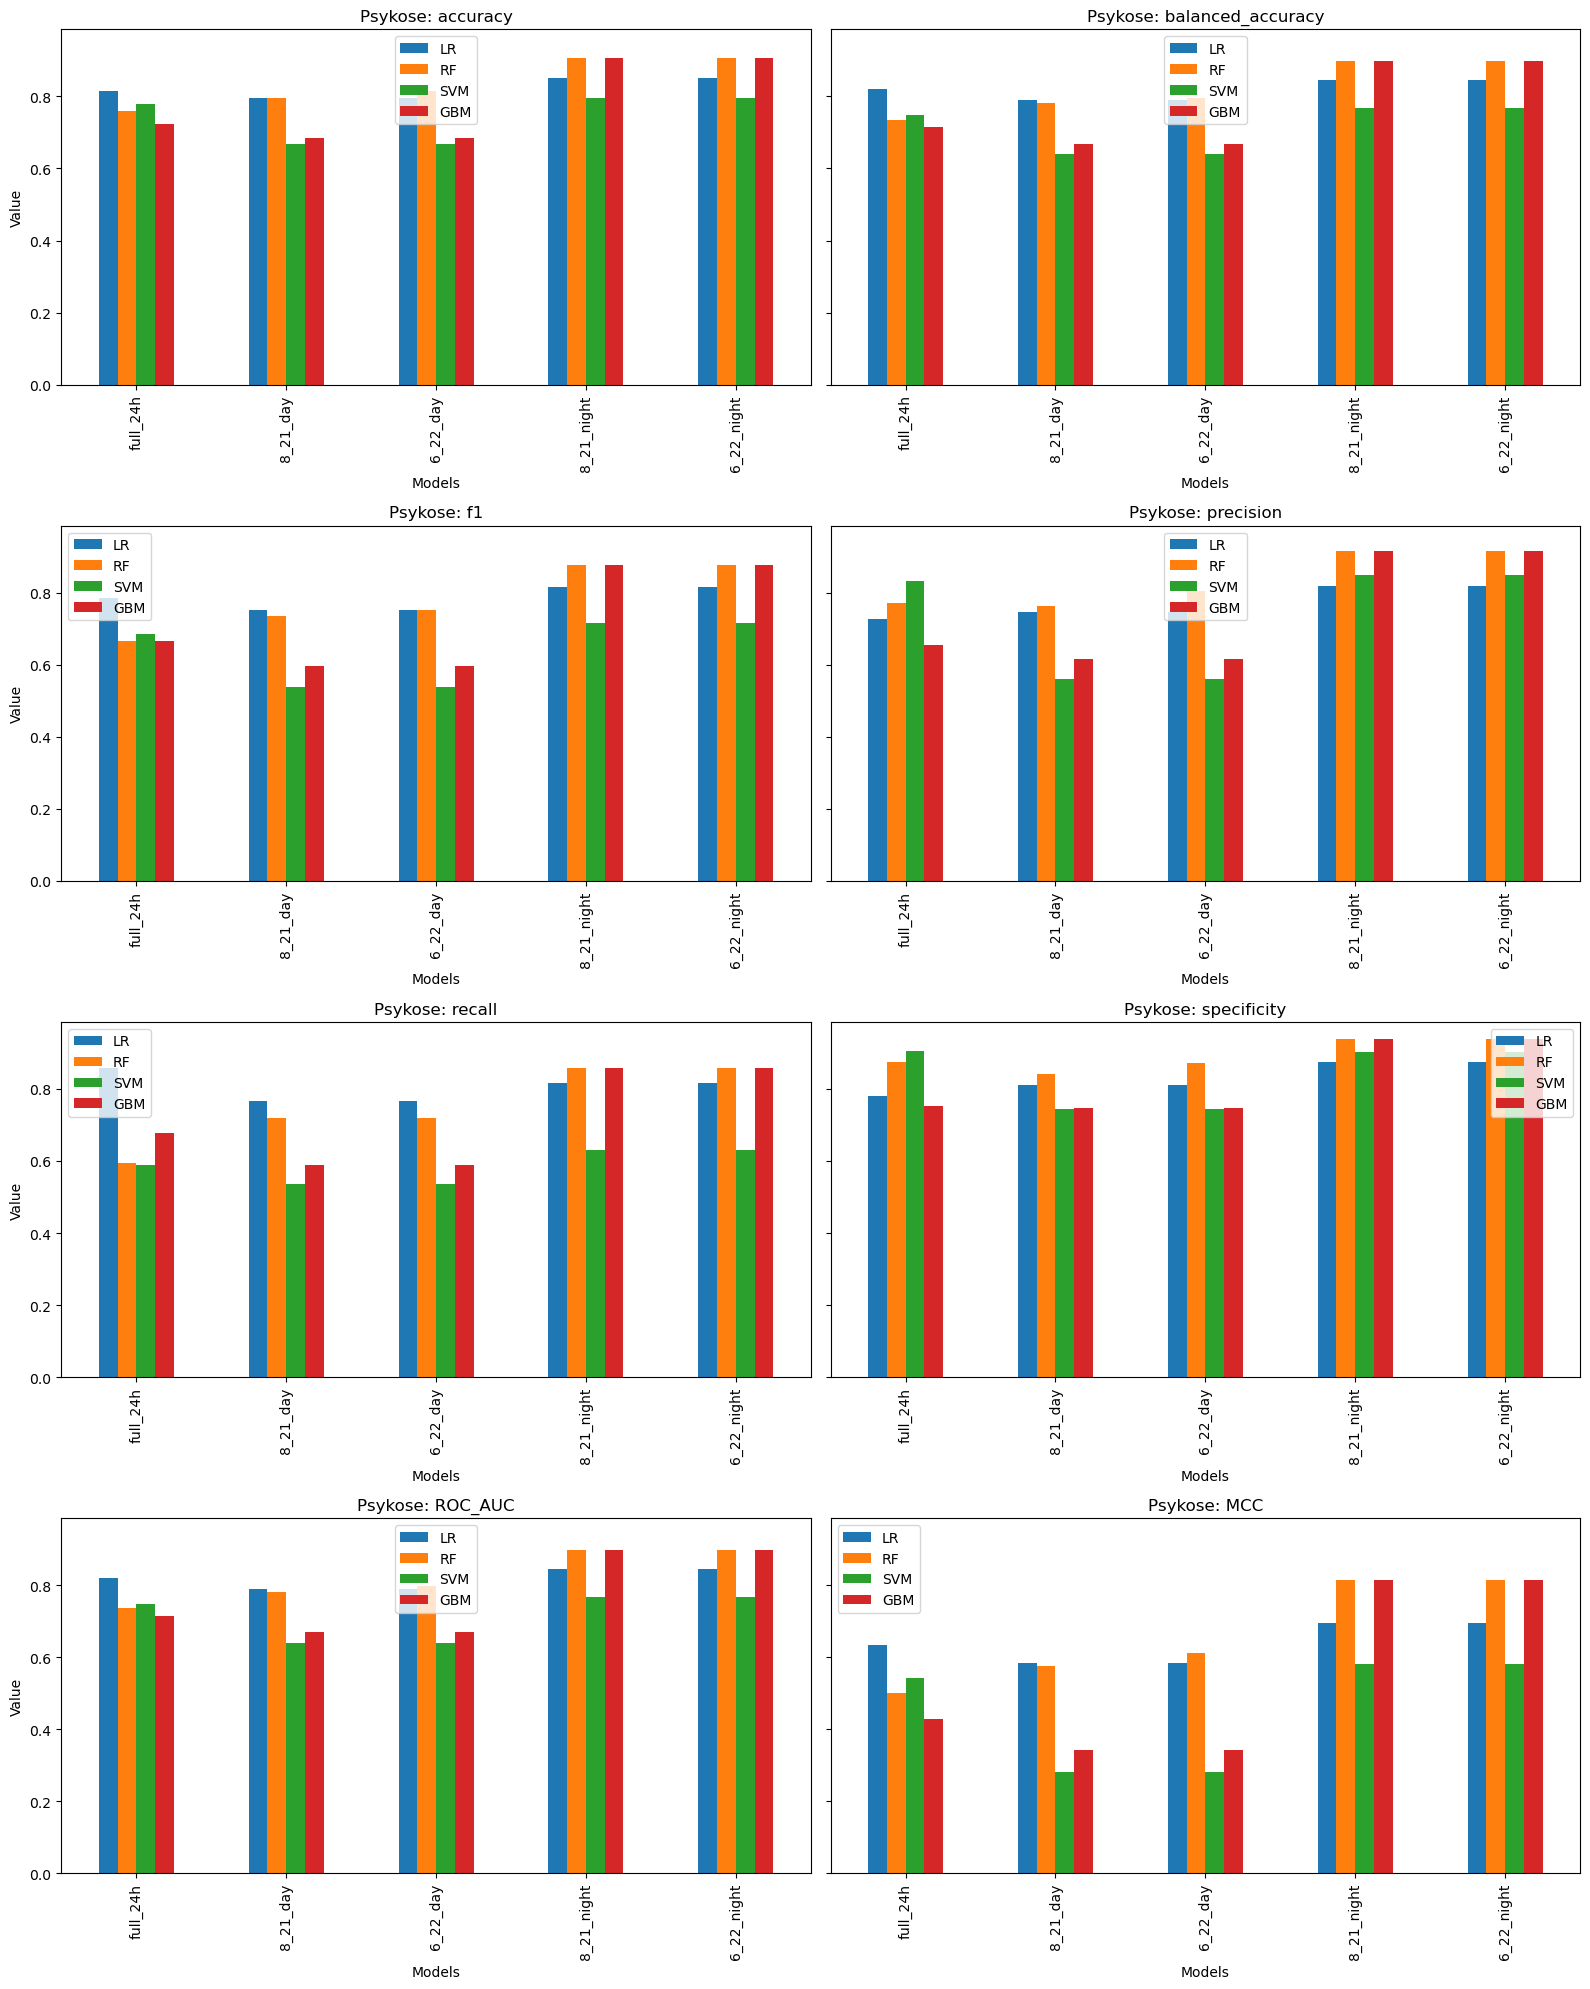

In [32]:
plot_model_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))

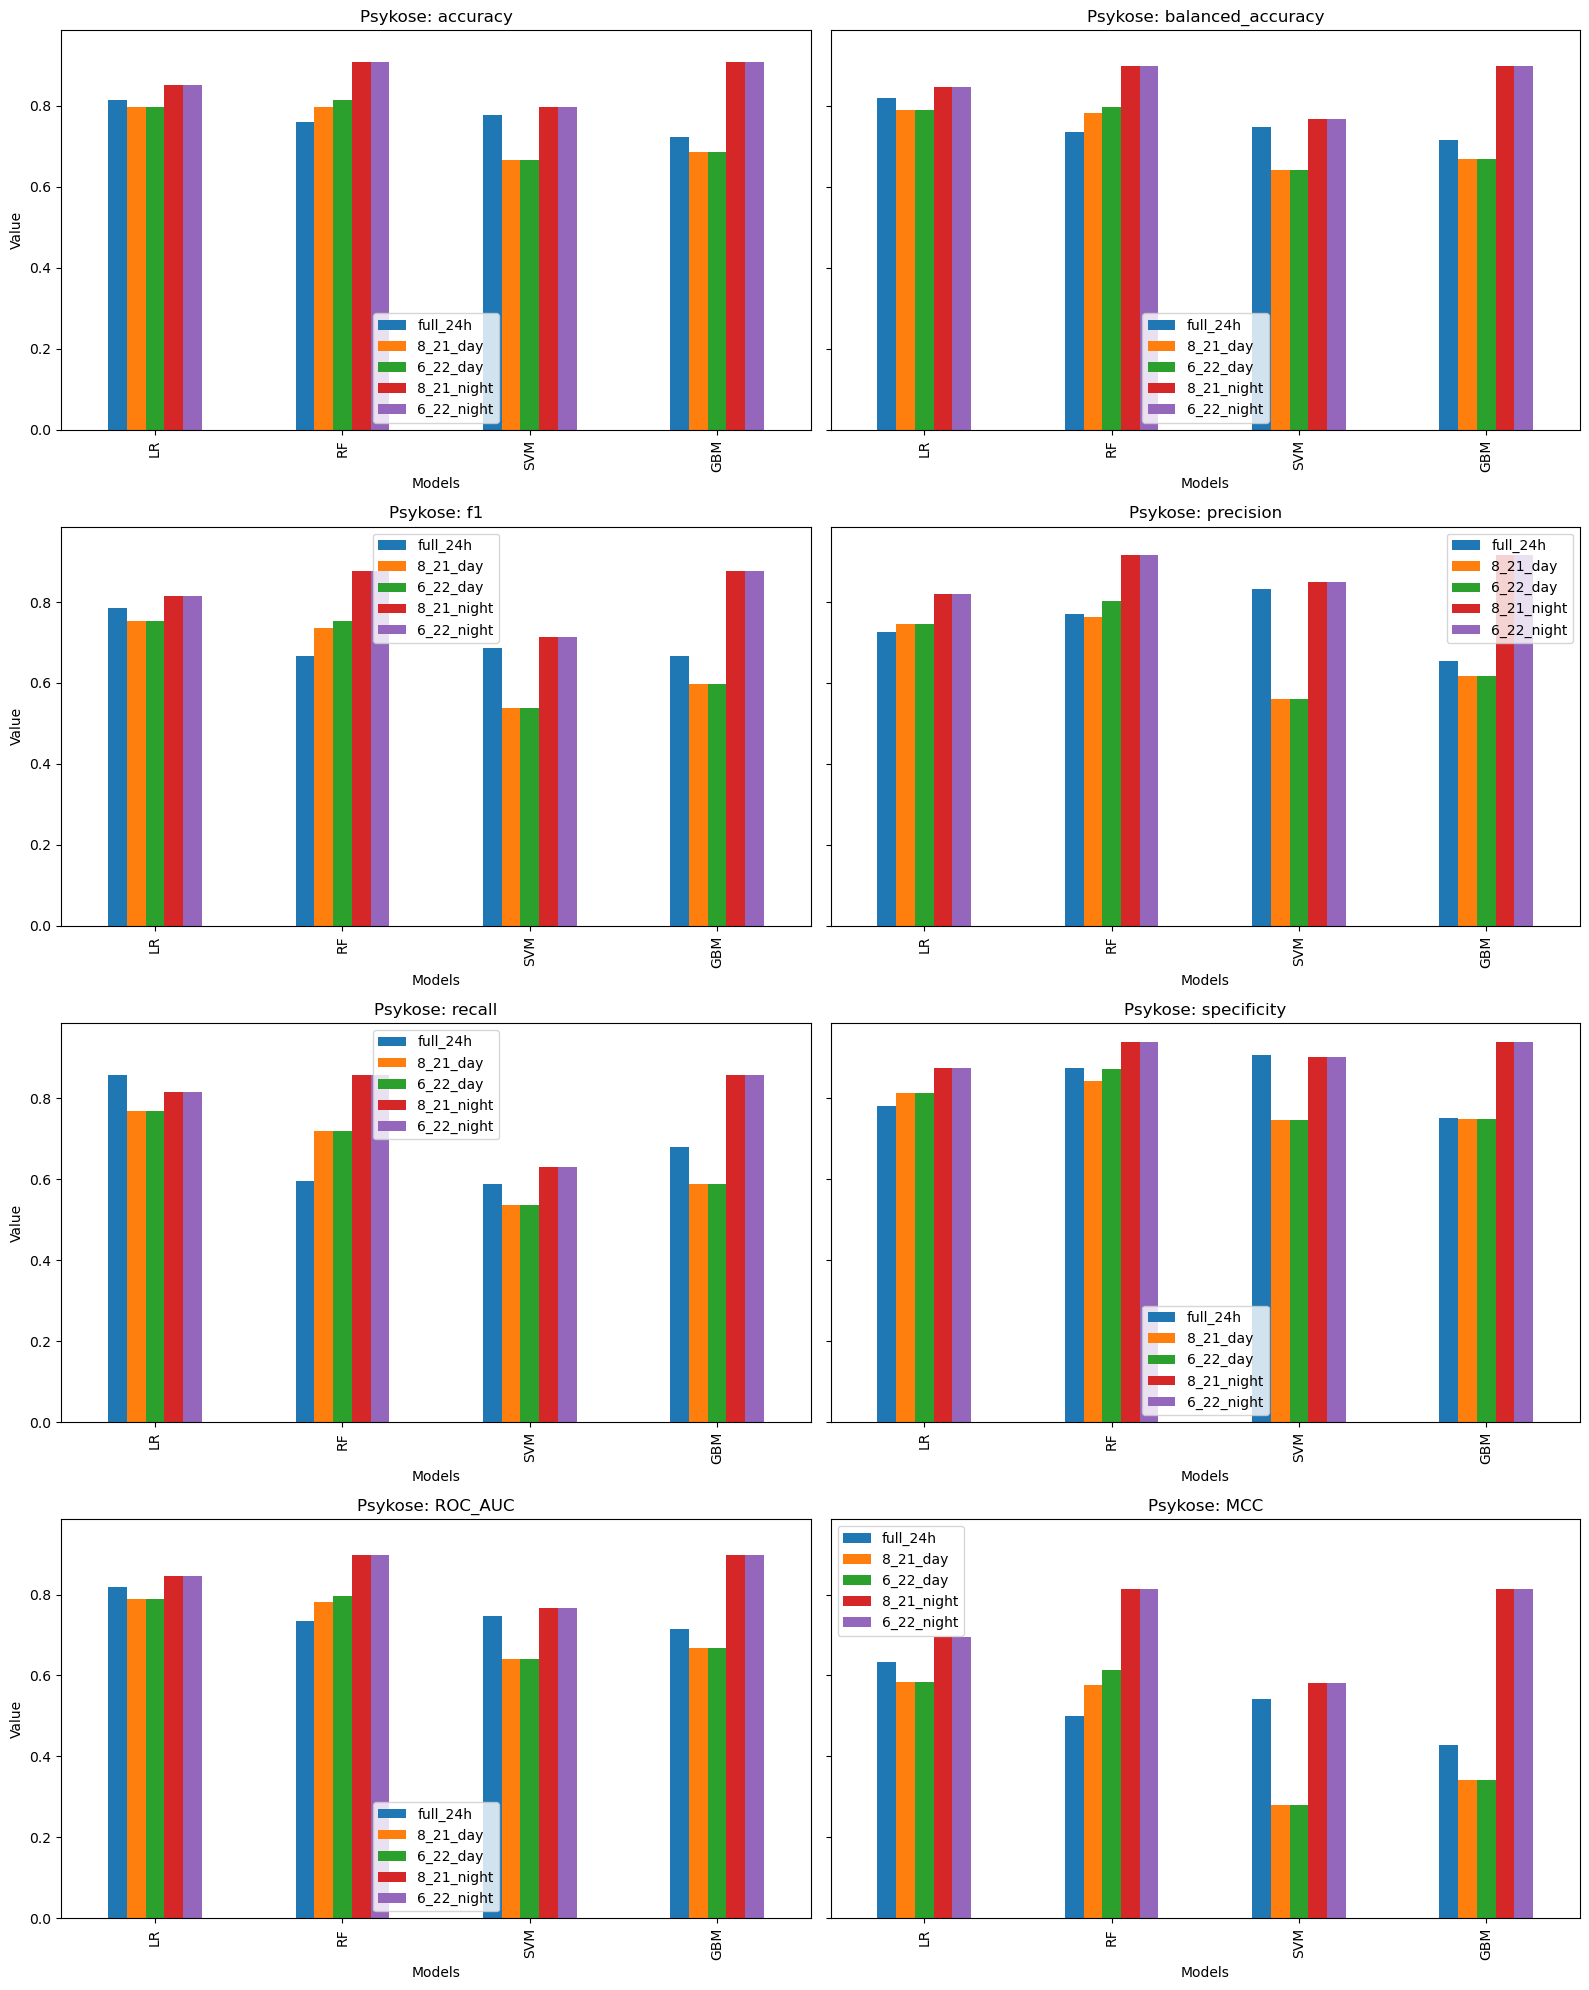

In [33]:
plot_day_night_full_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))

In [49]:
comparison_tables_psykose = create_comparison_table(all_models_results['psykose'])

In [50]:
comparison_tables_psykose['full_24h']

,LR,RF,SVM,GBM
accuracy,0.814815,0.759259,0.777778,0.722222
balanced_accuracy,0.819481,0.735498,0.747673,0.715043
f1,0.784392,0.665446,0.685648,0.665873
precision,0.726984,0.771429,0.833333,0.654762
recall,0.857143,0.595238,0.589286,0.678571
specificity,0.781818,0.875758,0.906061,0.751515
ROC_AUC,0.819481,0.735498,0.747673,0.715043
MCC,0.634090,0.499742,0.542123,0.428775


In [51]:
comparison_tables_psykose['8_21_day']

,LR,RF,SVM,GBM
accuracy,0.796296,0.796296,0.666667,0.685185
balanced_accuracy,0.789989,0.781331,0.640584,0.668885
f1,0.753142,0.734827,0.539239,0.597222
precision,0.745370,0.764021,0.561111,0.616667
recall,0.767857,0.720238,0.535714,0.589286
specificity,0.812121,0.842424,0.745455,0.748485
ROC_AUC,0.789989,0.781331,0.640584,0.668885
MCC,0.582893,0.575429,0.280791,0.342255


In [52]:
comparison_tables_psykose['6_22_day']

,LR,RF,SVM,GBM
accuracy,0.796296,0.814815,0.666667,0.685185
balanced_accuracy,0.789989,0.796483,0.640584,0.668885
f1,0.753142,0.753142,0.539239,0.597222
precision,0.745370,0.803704,0.561111,0.616667
recall,0.767857,0.720238,0.535714,0.589286
specificity,0.812121,0.872727,0.745455,0.748485
ROC_AUC,0.789989,0.796483,0.640584,0.668885
MCC,0.582893,0.612825,0.280791,0.342255


In [53]:
comparison_tables_psykose['8_21_night']

,LR,RF,SVM,GBM
accuracy,0.851852,0.907407,0.796296,0.907407
balanced_accuracy,0.845617,0.898268,0.766991,0.898268
f1,0.814744,0.877778,0.714646,0.877778
precision,0.819444,0.916667,0.850000,0.916667
recall,0.815476,0.857143,0.630952,0.857143
specificity,0.875758,0.939394,0.903030,0.939394
ROC_AUC,0.845617,0.898268,0.766991,0.898268
MCC,0.694067,0.813323,0.581019,0.813323


In [54]:
comparison_tables_psykose['6_22_night']

,LR,RF,SVM,GBM
accuracy,0.851852,0.907407,0.796296,0.907407
balanced_accuracy,0.845617,0.898268,0.766991,0.898268
f1,0.814744,0.877778,0.714646,0.877778
precision,0.819444,0.916667,0.850000,0.916667
recall,0.815476,0.857143,0.630952,0.857143
specificity,0.875758,0.939394,0.903030,0.939394
ROC_AUC,0.845617,0.898268,0.766991,0.898268
MCC,0.694067,0.813323,0.581019,0.813323
